## Python notebook template block B

As of now, you created a new notebook for every study day with the related contents. However, when working on a project in the real life, all your data and code needs to be in one place for the project. Going forward in the block, all of the code that you generate with regard to the final project about NAC and the ILO's should be in this one template. Go back to the code you wrote for the previous weeks, evaluate if it is according to [PEP8](https://peps.python.org/pep-0008/) style guide and adjust where necessary. This template provides you with a natural flow through the steps of a traditional data science project. Do not forget to clearly add comments to your code. If you would like to add more stucture, add extra mark down blocks to explain what you are doing. You are **not** allowed to remove code blocks! All blocks in here need to be filled with code. If you did not write code for a section, leave the code block as is with the pre-filled in comment. Adjust this template to your needs, make sure that all your evidence for all of the ILO's is included.

⚠️Important! Before handing it in, run all of your code. All your cells need to show outputs. This is necessary for grading!⚠️

The ILO's for which you can evidencodedodedodedodede your code by this notebook are: 

| ILO | Poor | Insufficient | Sufficient | Good | Excellent |
|-----|------|--------------|------------|------|-----------|
| 4.1 | x    | x            | x          | x    | x         |
| 4.2 | x    | x            | x          | x    | x*        |
| 5.0 | x    | x            | x          | x    | x         |
| 7.0 | x    | x            | x          | x    | x         |

4.2 excellent*: If you would like to showcast your graphs using streamlit, you need to hand in a seperate .py file. Evidence accordingly in your learning log.




### Add imports here
When working in .py files, you usually have all your package imports at the top of your code. This makes it easy to get a good overview of the packages that you are using and importing. As of now, we are working in .ipynb, but it is good practice to already start implementing these structures. Add all the imports that you use in all of your code in the code block below. In this way, you do not need to add it in every cell.

In [75]:
# Add your package imports here
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression, LogisticRegressionCV, Ridge, Lasso
from sklearn.metrics import mean_squared_error as mse 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, r2_score, accuracy_score, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
import warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.tree import DecisionTreeClassifier
import sympy as sp
import requests
from getpass import getpass
from mysql.connector import connect, Error
from sklearn.ensemble import RandomForestClassifier
import numpy as np


### Load the data

After your package imports, you usually load your data. This is what you will be working with and what your code will be based on.

In [2]:
directory_path = Path('C:/Users/tudor/Desktop/University/Y1 Block B/2023-24b-fai1-adsai-TudorPitulice234803/Evidence/2022_2023')

with open('DataLab_I_Week3_NAC_Preprocessing_1.csv', 'w') as csv_f:
    index = 0
    for file in directory_path.iterdir():
        data = pd.read_excel(file)
        if index == 0:
            data.to_csv(csv_f, index = False, header = True)
        else:
            data.to_csv(csv_f, index = False, header = False)
        index += 1

nacdata = pd.read_csv(r'DataLab_I_Week3_NAC_Preprocessing_1.csv')

## Data Management and Understanding

### Data Cleansing
In the following section plug in all of your relevant python codes and explanations related to data cleansing. This is related to the poor and insufficient criteria of ILO 4.1 and 4.2.

In [3]:
# Ignore ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

#The headers of the dataset present spaces in the name, so I will use the function .strip()
#to remove them (instead of 'Team', the name of the column in the dataset is 'Team    ').
nacdata.columns = nacdata.columns.str.strip()

#Checking for duplicates in the dataset.
nacdata.duplicated().sum()

#The dataset contains duplicates, so I will drop them.
nacdata = nacdata.drop_duplicates()

#In the NAC dataset I will drop the rows where the Market Value is missing
#because the price of the player is an important feature for the analysis.
nacdata['Market value'].dropna(inplace=True)

#The Position is an important feature for the analysis, so the missing values will be dropped.
#NAC cannot sign a player if they don't know his position.
nacdata.dropna(subset=['Position'], inplace=True)

#The column foot has missing values. I will replace NaN with 'Unknown'.
nacdata['Foot'] = nacdata['Foot'].fillna('Missing')
#Replace the value 'Missing' with 'Unknown'.
nacdata['Foot'] = nacdata['Foot'].replace('Missing', 'unknown') 

#Filling the missing values in the Team column with 'Unknown'.
nacdata['Team'] = nacdata['Team'].fillna('Unknown')

#The Height feature present some missing values, so since the Height is not an essential feature,
#I will fill them with the median. The distribution of the column is skewed and the median is 
#a better measure of central tendency than the mean.
nacdata['Height'] = nacdata['Height'].fillna(nacdata['Height'].median())

#The same thing applies to the Weight feature.
nacdata['Weight'] = nacdata['Weight'].fillna(nacdata['Weight'].median())
nacdata['Weight'] = nacdata['Weight'].replace(0, nacdata['Weight'].median())

#The Age feature has 7 missing values. Being such a small number of missing values, I will drop them.
nacdata.dropna(subset=['Age'], inplace=True)

#Visualizing the missing values in a csv file for better understanding.
nacdata.isnull().sum().to_csv('NAC_missing_values.csv')

### Exploratory Data Analysis

Include all exploratory Data Analysis questions you studied in this section. This is related to the sufficient and good criteria of ILO 4.1 and 4.2. 

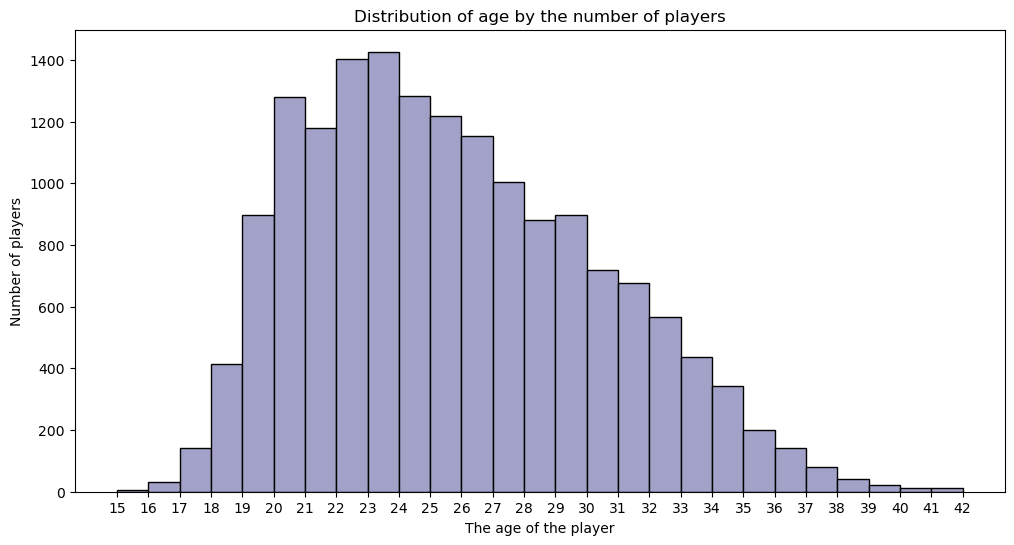

In [4]:
#In this part of the code I wanted to see the distribution of the players by their age.
fig, ax = plt.subplots(figsize=(12,6))

age = nacdata['Age']
ax.hist(age, bins = 27, color = '#a2a2c8', edgecolor = 'black')
ax.set_xlabel('The age of the player')
ax.set_ylabel('Number of players')
plt.xticks(range(15, 43))
plt.title('Distribution of age by the number of players')
plt.show()

#We can see that the majority of players are aged between 20 and 25 years olds. So, for further analysis we can consider more the players between 19 and
#35 years old because the players under 19 years old are not mature enough and the players over 35 years old are too old to play at a high level.

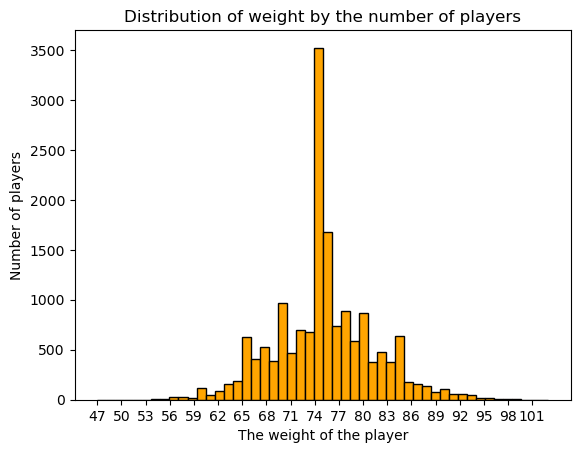

In [5]:
#In this part of the code I wanted to see the distribution of the players by their height.
weight = nacdata['Weight']

fig, ax = plt.subplots()

ax.hist(weight, bins = 50, color = 'orange', edgecolor='black', label = 'Weight')

#I choose the ticks of the x axis to be between 47 and 103 because the minimum weight of a player. 
#In order for the visualisation to be clear I choose the ticks to be every 3 units.
plt.xticks(range(47, 103, 3), rotation = 90)
plt.title('Distribution of weight by the number of players')
plt.xlabel('The weight of the player')
plt.ylabel('Number of players')
plt.xticks(rotation = 0)

plt.show()

#Most players have a weight between 70 and 80 kg.
#The minimum weight of a player is 47 kg and the maximum weight is 103 kg.

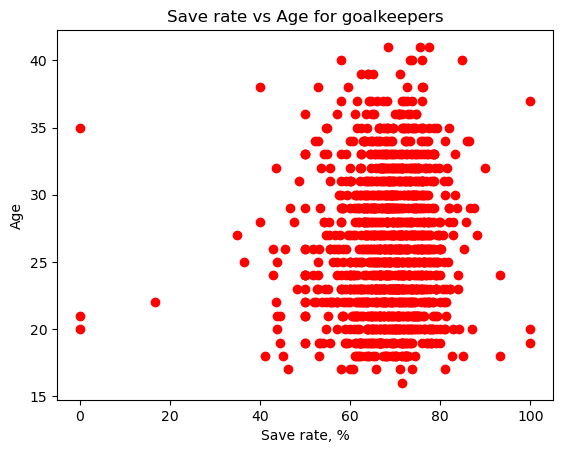

In [6]:
#In the next graph I wanted to see if there is a correlation between the age of the goalkeepers and their save rate.
gk = nacdata[nacdata['Position'] == 'GK']

fig, ax = plt.subplots()

plt.scatter(gk['Save rate, %'], gk['Age'], c='red')
ax.set_xlabel('Save rate, %')
ax.set_ylabel('Age')
plt.title('Save rate vs Age for goalkeepers')

plt.show()

#We can see that there is no correlation between the age of the goalkeepers and their save rate.

### Visualizations

Include all the visualizations you made in this section. This is related to the excellent criteria of ILO 4.2. Use the blocks below to enter the code for graphs you created with matplotlib (or seaborn, bokeh, or another visualization package). 

❗ If you would like to showcast your visualizations using streamlit, you need to hand in a seperate .py file for this. It is not possible to run streamlit code from a python notebook. Please note down below if you do so.

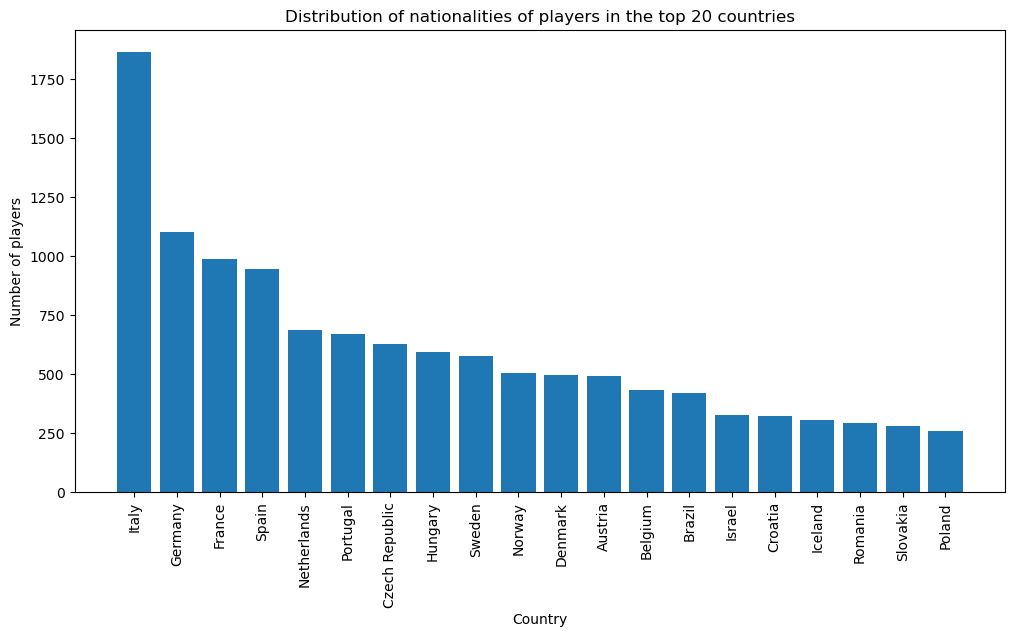

In [7]:
# Add visualizations here that you made to present insights in the NAC data. Create a new codeblock for every graph. Add markdown blocks to describe your graphs where necessary.
fig, ax = plt.subplots(figsize=(12,6))

birthplace_counts = nacdata['Birth country'].value_counts().head(20)
ax.bar(birthplace_counts.index, birthplace_counts)

ax.set_ylabel('Number of players')
ax.set_xlabel('Country')
plt.xticks(rotation = 90)
plt.title('Distribution of nationalities of players in the top 20 countries')
plt.show()

#The majority of the players are coming from Italy, Germany and France.

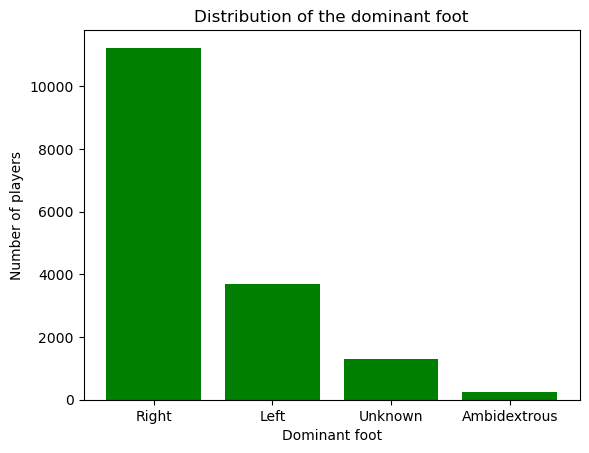

In [8]:
fig, ax = plt.subplots()

foot = pd.DataFrame(nacdata['Foot'])

x_axis = ['Right', 'Left', 'Unknown', 'Ambidextrous']

ax.bar(x_axis, foot.value_counts(), color = 'green')
ax.set_xticks(x_axis)

ax.set_ylabel('Number of players')
ax.set_xlabel('Dominant foot')

plt.title('Distribution of the dominant foot')
plt.show()

#From the graph we can see that the majority of the players are right footed.

### Database and ETL

Include all the python code and explanations on your RESTful API and database operations in this section. This is related to the excellent criteria of ILO 4.1.

❗ These code you cannot showcast using the NAC data. Use the data provided for the homework and datalab preperation of these modules.

    API code

In [9]:
# Include your code here for for the API and ETL. This is not done on the NAC data.
requests.get("https://randomuser.me/api/")

<Response [200]>

In [10]:
response = requests.get("https://randomuser.me/api/")
response.text

'{"results":[{"gender":"female","name":{"title":"Ms","first":"Florence","last":"Cooper"},"location":{"street":{"number":5540,"name":"Anglesea Street"},"city":"Auckland","state":"Wellington","country":"New Zealand","postcode":21724,"coordinates":{"latitude":"49.9551","longitude":"15.5642"},"timezone":{"offset":"-12:00","description":"Eniwetok, Kwajalein"}},"email":"florence.cooper@example.com","login":{"uuid":"41b0800e-25ef-43fb-bf04-dd87ad0242c1","username":"crazysnake831","password":"102938","salt":"x49p0SB7","md5":"f152408ce8eb201831f9806f9a8f74cb","sha1":"dd82261a2d60b91cf4e67ffd7125698c0c155ae3","sha256":"050fd84cdd48ee4f7fc8030202b16fda9e2470bbcbcaf64177096f31e9de5b29"},"dob":{"date":"1975-07-21T00:41:10.133Z","age":48},"registered":{"date":"2011-11-19T01:37:46.103Z","age":12},"phone":"(801)-217-1246","cell":"(413)-796-0377","id":{"name":"","value":null},"picture":{"large":"https://randomuser.me/api/portraits/women/64.jpg","medium":"https://randomuser.me/api/portraits/med/women/64

In [11]:
response = requests.get("https://api.thecatapi.com/")
response.text

'{"message":"The Cat API","version":"1.3.7"}'

In [12]:
response = requests.get("https://api.thecatapi.com/v1/breeds")
response.text

'[{"weight":{"imperial":"7  -  10","metric":"3 - 5"},"id":"abys","name":"Abyssinian","cfa_url":"http://cfa.org/Breeds/BreedsAB/Abyssinian.aspx","vetstreet_url":"http://www.vetstreet.com/cats/abyssinian","vcahospitals_url":"https://vcahospitals.com/know-your-pet/cat-breeds/abyssinian","temperament":"Active, Energetic, Independent, Intelligent, Gentle","origin":"Egypt","country_codes":"EG","country_code":"EG","description":"The Abyssinian is easy to care for, and a joy to have in your home. They’re affectionate cats and love both people and other animals.","life_span":"14 - 15","indoor":0,"lap":1,"alt_names":"","adaptability":5,"affection_level":5,"child_friendly":3,"dog_friendly":4,"energy_level":5,"grooming":1,"health_issues":2,"intelligence":5,"shedding_level":2,"social_needs":5,"stranger_friendly":5,"vocalisation":1,"experimental":0,"hairless":0,"natural":1,"rare":0,"rex":0,"suppressed_tail":0,"short_legs":0,"wikipedia_url":"https://en.wikipedia.org/wiki/Abyssinian_(cat)","hypoallerg

In [13]:
response = requests.get("https://api.thedogapi.com/v1/breeds")
response.text

'[{"weight":{"imperial":"6 - 13","metric":"3 - 6"},"height":{"imperial":"9 - 11.5","metric":"23 - 29"},"id":1,"name":"Affenpinscher","bred_for":"Small rodent hunting, lapdog","breed_group":"Toy","life_span":"10 - 12 years","temperament":"Stubborn, Curious, Playful, Adventurous, Active, Fun-loving","origin":"Germany, France","reference_image_id":"BJa4kxc4X"},{"weight":{"imperial":"50 - 60","metric":"23 - 27"},"height":{"imperial":"25 - 27","metric":"64 - 69"},"id":2,"name":"Afghan Hound","country_code":"AG","bred_for":"Coursing and hunting","breed_group":"Hound","life_span":"10 - 13 years","temperament":"Aloof, Clownish, Dignified, Independent, Happy","origin":"Afghanistan, Iran, Pakistan","reference_image_id":"hMyT4CDXR"},{"weight":{"imperial":"44 - 66","metric":"20 - 30"},"height":{"imperial":"30","metric":"76"},"id":3,"name":"African Hunting Dog","bred_for":"A wild pack animal","life_span":"11 years","temperament":"Wild, Hardworking, Dutiful","origin":"","reference_image_id":"rkiByec

In [14]:
response = requests.get("https://api.thecatapi.com/v1/breeds")
response
response.status_code
response.text
response.headers
response.request
request = response.request
request.path_url
request.method
request.headers

{'User-Agent': 'python-requests/2.31.0', 'Accept-Encoding': 'gzip, deflate, br', 'Accept': '*/*', 'Connection': 'keep-alive'}

In [15]:
response = requests.get("https://api.thecatapi.com/v1/breeds")
response
response.status_code
response.reason

'OK'

In [16]:
response = requests.get("https://api.thecatapi.com/v1/breedz")
response
response.status_code
response.reason

'Not Found'

In [17]:
response = requests.get("https://api.thecatapi.com/v1/breeds/abys")
response.headers

{'x-dns-prefetch-control': 'off', 'x-frame-options': 'SAMEORIGIN', 'strict-transport-security': 'max-age=15552000; includeSubDomains', 'x-download-options': 'noopen', 'x-content-type-options': 'nosniff', 'x-xss-protection': '1; mode=block', 'vary': 'Origin', 'content-type': 'application/json; charset=utf-8', 'x-response-time': '1ms', 'X-Cloud-Trace-Context': '56a6a30a827a51246816e55279ccaed6', 'Date': 'Fri, 26 Jan 2024 14:10:26 GMT', 'Server': 'Google Frontend', 'Content-Length': '1041'}

In [18]:
response = requests.get("https://api.thecatapi.com/v1/breeds/abys")
response.request.headers

{'User-Agent': 'python-requests/2.31.0', 'Accept-Encoding': 'gzip, deflate, br', 'Accept': '*/*', 'Connection': 'keep-alive'}

In [19]:
headers = {"X-Request-Id": "<my-request-id>"}
response = requests.get("https://example.org", headers=headers)
response.request.headers

{'User-Agent': 'python-requests/2.31.0', 'Accept-Encoding': 'gzip, deflate, br', 'Accept': '*/*', 'Connection': 'keep-alive', 'X-Request-Id': '<my-request-id>'}

In [20]:
response = requests.get("https://api.thecatapi.com/v1/breeds/abys")
response.headers.get("Content-Type")

'application/json; charset=utf-8'

In [21]:
url = "https://image-charts.com/chart?chs=700x125&cht=ls&chd=t:23,15,28"
response = requests.get(url)
response
response.headers.get("Content-Type")

'image/png'

In [22]:
response = requests.get("https://api.thecatapi.com/v1/breeds/abys")
response.headers.get("Content-Type")
response.content

b'{"weight":{"imperial":"7  -  10","metric":"3 - 5"},"id":"abys","name":"Abyssinian","cfa_url":"http://cfa.org/Breeds/BreedsAB/Abyssinian.aspx","vetstreet_url":"http://www.vetstreet.com/cats/abyssinian","vcahospitals_url":"https://vcahospitals.com/know-your-pet/cat-breeds/abyssinian","temperament":"Active, Energetic, Independent, Intelligent, Gentle","origin":"Egypt","country_codes":"EG","country_code":"EG","description":"The Abyssinian is easy to care for, and a joy to have in your home. They\xe2\x80\x99re affectionate cats and love both people and other animals.","life_span":"14 - 15","indoor":0,"lap":1,"alt_names":"","adaptability":5,"affection_level":5,"child_friendly":3,"dog_friendly":4,"energy_level":5,"grooming":1,"health_issues":2,"intelligence":5,"shedding_level":2,"social_needs":5,"stranger_friendly":5,"vocalisation":1,"experimental":0,"hairless":0,"natural":1,"rare":0,"rex":0,"suppressed_tail":0,"short_legs":0,"wikipedia_url":"https://en.wikipedia.org/wiki/Abyssinian_(cat)",

In [23]:
response = requests.get("https://api.thecatapi.com/v1/breeds/abys")
response.headers.get("Content-Type")

response.json()

response.json()["name"]

'Abyssinian'

In [24]:
url = "https://image-charts.com/chart?chs=700x125&cht=ls&chd=t:23,15,28"
response = requests.get(url)
response


response.headers.get("Content-Type")


response.content

b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x02\xbc\x00\x00\x00}\x08\x02\x00\x00\x00\xcf\xf3\',\x00\x00\r\xd8IDATx\xda\xed\xdd\xcboT\xd7\x01\x80\xf1s\xc6\xf81\xef\x87\x8dg\\\x1a\x11\x88\x8d \x9b\x00&\xabF(Q\x14\xb5\xcb.\x10\xb1\x13\xda\xb0\x8c\x92\n\x95\xa8ib\x036\t~\x88\x02^5RXV\xd9%\x1b\xc8\x7f\x90J\xe9\x82\x14\x89$\x80L\xf3\xa2\x11\xe0\xb1=/\xcf\xdb\xf6\xcc=\xd5\xb9w<3~\x86P\x9bx<\xdfO\xd6\xd5\\\x03\x03\x0c~|\x9c{\xce\xb9R)%\x00\x00\x00~\x8a$\x1a\x00\x00\x00\xd1\x00\x00\xc0\xc6\xca\xe7\xf3G\x8f\x1e=s\xe6\xcc\xb3\xcf>\xbb\xa1\xbfQ6\x9b\xed\xe9\xe9\x19\x18\x188t\xe8\xd0\xda?\xf3\xda\xb5kCCC\x9f|\xf2Iss3\xd1\x00\x00\xc0fa\x18\xc6\xf5\xeb\xd7\xf7\xec\xd9\xe3\xf5z\x89\x06\x00\x00\xb0\xaa\xf2H\xc3\xd7_\x7f}\xe5\xca\x95\xf2\xfb\x9f\x7f\xfe\xf9\xb7\xdezK\x08199\xd9\xdf\xdf?==\xdd\xd9\xd9966\xb6\xe2i{{\xfb\xe8\xe8\xe8\xf2\'\x7f\xf0\xe0\xc1\x993g\x82\xc1\xe0\xd0\xd0P>\x9f\xef\xe9\xe9\x11B\xbc\xf0\xc2\x0b\'O\x9e\x14B\x84\xc3\xe1S\xa7NMOOwuu]\xbat)\x95J\xf5\xf7\xf7www?\xfd\xf4\xd3CCCB\x08\xab

In [25]:
with open("chart.png", mode="wb") as file:
    file.write(response.content)

In [26]:
requests.post("https://api.thecatapi.com/v1/breeds/abys")


requests.get("https://api.thecatapi.com/v1/breeds/abys")


requests.put("https://api.thecatapi.com/v1/breeds/abys")


requests.delete("https://api.thecatapi.com/v1/breeds/abys")

<Response [405]>

In [27]:
requests.get("https://randomuser.me/api/").json()

{'results': [{'gender': 'female',
   'name': {'title': 'Miss', 'first': 'Mihaela', 'last': 'Španović'},
   'location': {'street': {'number': 7242, 'name': 'Jovana Meteorite'},
    'city': 'Temerin',
    'state': 'North Bačka',
    'country': 'Serbia',
    'postcode': 94764,
    'coordinates': {'latitude': '59.2851', 'longitude': '42.8495'},
    'timezone': {'offset': '+3:30', 'description': 'Tehran'}},
   'email': 'mihaela.spanovic@example.com',
   'login': {'uuid': '8b09b5d6-fc1d-4ed7-923a-6ef0205bd5b4',
    'username': 'purplegoose925',
    'password': 'caster',
    'salt': 'XhZ31Dfk',
    'md5': '180caeae6b304d890691b988756e00bc',
    'sha1': 'c451449e5fe311f280bfe6fe74106ac0b7023101',
    'sha256': 'ee3a6a0250416c6183e7c701a72d9c6d7729cf22e9861a7f2de35c1d8e2f46c3'},
   'dob': {'date': '2000-05-08T07:18:40.903Z', 'age': 23},
   'registered': {'date': '2003-04-24T18:47:10.617Z', 'age': 20},
   'phone': '013-7837-230',
   'cell': '065-9610-309',
   'id': {'name': 'SID', 'value': '3279

In [28]:
requests.get("https://randomuser.me/api/?gender=female").json()

{'results': [{'gender': 'female',
   'name': {'title': 'Miss', 'first': 'Dörte', 'last': 'Borchers'},
   'location': {'street': {'number': 7373, 'name': 'Königsberger Straße'},
    'city': 'Nagold',
    'state': 'Schleswig-Holstein',
    'country': 'Germany',
    'postcode': 72795,
    'coordinates': {'latitude': '-52.0557', 'longitude': '-95.8032'},
    'timezone': {'offset': '+6:00', 'description': 'Almaty, Dhaka, Colombo'}},
   'email': 'dorte.borchers@example.com',
   'login': {'uuid': '11cb89eb-e628-4952-98af-935040a0d7ce',
    'username': 'redwolf636',
    'password': 'kirsty',
    'salt': '3yiIMwl2',
    'md5': '482b2c78637b66ab34830b0fc5b69412',
    'sha1': '65e5cedc33e452356ff32baca46bcff73ef5d423',
    'sha256': 'c34fa490adffce3616a6ebaa3bd3ea5d420c0cf8d428c8a9de38a8ba1a7d8c85'},
   'dob': {'date': '1956-10-23T12:34:26.867Z', 'age': 67},
   'registered': {'date': '2008-12-07T16:53:17.674Z', 'age': 15},
   'phone': '0206-0848903',
   'cell': '0174-0480885',
   'id': {'name': '

In [29]:
requests.get("https://randomuser.me/api/?gender=female&nat=de").json()

{'results': [{'gender': 'female',
   'name': {'title': 'Miss', 'first': 'Grit', 'last': 'Ludewig'},
   'location': {'street': {'number': 1683, 'name': 'Kirchweg'},
    'city': 'Löwenstein',
    'state': 'Nordrhein-Westfalen',
    'country': 'Germany',
    'postcode': 34398,
    'coordinates': {'latitude': '18.5082', 'longitude': '-46.1225'},
    'timezone': {'offset': '-12:00', 'description': 'Eniwetok, Kwajalein'}},
   'email': 'grit.ludewig@example.com',
   'login': {'uuid': '81028894-a16e-41ce-8993-5e56f3101651',
    'username': 'organicduck413',
    'password': 'masamune',
    'salt': 'QeA7eV4H',
    'md5': 'c0ea3196df9e0eafb8b36a6ef3a8c4dc',
    'sha1': '0e70746800ade21b06d234eaa087aafb5a467012',
    'sha256': 'f5d36367bbb0ae316d8b2484aea02b4f3c0c983c6730d69ecc72ac0de6599484'},
   'dob': {'date': '1996-11-02T07:16:13.770Z', 'age': 27},
   'registered': {'date': '2009-05-27T11:19:59.437Z', 'age': 14},
   'phone': '0920-0043013',
   'cell': '0173-0799161',
   'id': {'name': 'SVNR', 

In [30]:
query_params = {"gender": "female", "nat": "de"}
requests.get("https://randomuser.me/api/", params=query_params).json()

{'results': [{'gender': 'female',
   'name': {'title': 'Miss', 'first': 'Camilla', 'last': 'Stephan'},
   'location': {'street': {'number': 6051, 'name': 'Marktplatz'},
    'city': 'Grafenwöhr',
    'state': 'Hamburg',
    'country': 'Germany',
    'postcode': 71238,
    'coordinates': {'latitude': '-55.0715', 'longitude': '-127.0206'},
    'timezone': {'offset': '+5:00',
     'description': 'Ekaterinburg, Islamabad, Karachi, Tashkent'}},
   'email': 'camilla.stephan@example.com',
   'login': {'uuid': 'd1a9945a-610c-4c39-93af-bf6e443aeb50',
    'username': 'redwolf720',
    'password': 'cartoon',
    'salt': 'xedWWnKh',
    'md5': 'a3ab8bb454a68941a13b325680631f51',
    'sha1': 'fc9e818deaeda6ff2499b46b9a00eae6d6b9a0ee',
    'sha256': 'ce3ed740064a8111f571486b81ac130cd211e5961f0f203a48ac1c3715d77322'},
   'dob': {'date': '2000-08-19T07:22:14.982Z', 'age': 23},
   'registered': {'date': '2010-03-12T09:06:17.611Z', 'age': 13},
   'phone': '0322-6873025',
   'cell': '0171-1422024',
   'id

In [31]:
query_params = {"q": "ragamuffin"}
endpoint = "https://api.thecatapi.com/v1/breeds/search"
requests.get(endpoint, params=query_params).json()

[{'weight': {'imperial': '8 - 20', 'metric': '4 - 9'},
  'id': 'raga',
  'name': 'Ragamuffin',
  'cfa_url': 'http://cfa.org/Breeds/BreedsKthruR/Ragamuffin.aspx',
  'vetstreet_url': 'http://www.vetstreet.com/cats/ragamuffin',
  'vcahospitals_url': 'https://vcahospitals.com/know-your-pet/cat-breeds/ragamuffin',
  'temperament': 'Affectionate, Friendly, Gentle, Calm',
  'origin': 'United States',
  'country_codes': 'US',
  'country_code': 'US',
  'description': 'The Ragamuffin is calm, even tempered and gets along well with all family members. Changes in routine generally do not upset her. She is an ideal companion for those in apartments, and with children due to her patient nature.',
  'life_span': '12 - 16',
  'indoor': 0,
  'lap': 1,
  'alt_names': '',
  'adaptability': 5,
  'affection_level': 5,
  'child_friendly': 4,
  'dog_friendly': 5,
  'energy_level': 3,
  'grooming': 3,
  'health_issues': 3,
  'intelligence': 5,
  'shedding_level': 3,
  'social_needs': 3,
  'stranger_friendly':

In [32]:
endpoint = "https://api.nasa.gov/mars-photos/api/v1/rovers/curiosity/photos"
# Replace DEMO_KEY below with your own key if you generated one.
api_key = "DEMO_KEY"
query_params = {"api_key": api_key, "earth_date": "2020-07-01"}
response = requests.get(endpoint, params=query_params)
response

<Response [200]>

In [33]:
response.json()

photos = response.json()["photos"]
print(f"Found {len(photos)} photos")

photos[4]["img_src"]

Found 12 photos


'https://mars.nasa.gov/msl-raw-images/proj/msl/redops/ods/surface/sol/02809/opgs/edr/rcam/RRB_646869036EDR_F0810628RHAZ00337M_.JPG'

In [34]:
CLIENT_ID = "<REPLACE_WITH_CLIENT_ID>"
CLIENT_SECRET = "<REPLACE_WITH_CLIENT_SECRET>"

REDIRECT_URI = "<REPLACE_WITH_REDIRECT_URI>"

In [35]:
# github.py

def create_oauth_link():
    params = {
        "client_id": CLIENT_ID,
        "redirect_uri": REDIRECT_URI,
        "scope": "user",
        "response_type": "code",
    }

    endpoint = "https://github.com/login/oauth/authorize"
    response = requests.get(endpoint, params=params)
    return response.url

In [36]:

def exchange_code_for_access_token(code=None):
    params = {
        "client_id": CLIENT_ID,
        "client_secret": CLIENT_SECRET,
        "redirect_uri": REDIRECT_URI,
        "code": code,
    }

    headers = {"Accept": "application/json"}
    endpoint = "https://github.com/login/oauth/access_token"
    response = requests.post(endpoint, params=params, headers=headers).json()
    return response["access_token"]

In [38]:
link = create_oauth_link()
print(f"Follow the link to start the authentication with GitHub: {link}")
code = input("GitHub code: ")
access_token = exchange_code_for_access_token(code)
print(f"Exchanged code {code} with access token: {access_token}")

Follow the link to start the authentication with GitHub: https://github.com/login?client_id=%3CREPLACE_WITH_CLIENT_ID%3E&return_to=%2Flogin%2Foauth%2Fauthorize%3Fclient_id%3D%253CREPLACE_WITH_CLIENT_ID%253E%26redirect_uri%3D%253CREPLACE_WITH_REDIRECT_URI%253E%26response_type%3Dcode%26scope%3Duser


KeyError: 'access_token'

In [37]:
def print_user_info(access_token=None):
    headers = {"Authorization": f"token {access_token}"}
    endpoint = "https://api.github.com/user"
    response = requests.get(endpoint, headers=headers).json()
    name = response["name"]
    username = response["login"]
    private_repos_count = response["total_private_repos"]
    print(
        f"{name} ({username}) | private repositories: {private_repos_count}"
    )

In [38]:
CLIENT_ID = "<REPLACE_WITH_CLIENT_ID>"
CLIENT_SECRET = "<REPLACE_WITH_CLIENT_SECRET>"

REDIRECT_URI = "<REPLACE_WITH_REDIRECT_URI>"

def create_oauth_link():
    params = {
        "client_id": CLIENT_ID,
        "redirect_uri": REDIRECT_URI,
        "scope": "user",
        "response_type": "code",
    }
    endpoint = "https://github.com/login/oauth/authorize"
    response = requests.get(endpoint, params=params)
    return response.url

def exchange_code_for_access_token(code=None):
    params = {
        "client_id": CLIENT_ID,
        "client_secret": CLIENT_SECRET,
        "redirect_uri": REDIRECT_URI,
        "code": code,
    }
    headers = {"Accept": "application/json"}
    endpoint = "https://github.com/login/oauth/access_token"
    response = requests.post(endpoint, params=params, headers=headers).json()
    return response["access_token"]

def print_user_info(access_token=None):
    headers = {"Authorization": f"token {access_token}"}
    endpoint = "https://api.github.com/user"
    response = requests.get(endpoint, headers=headers).json()
    name = response["name"]
    username = response["login"]
    private_repos_count = response["total_private_repos"]
    print(
        f"{name} ({username}) | private repositories: {private_repos_count}"
    )

link = create_oauth_link()
print(f"Follow the link to start the authentication with GitHub: {link}")
code = input("GitHub code: ")
access_token = exchange_code_for_access_token(code)
print(f"Exchanged code {code} with access token: {access_token}")
print_user_info(access_token=access_token)

Follow the link to start the authentication with GitHub: https://github.com/login?client_id=%3CREPLACE_WITH_CLIENT_ID%3E&return_to=%2Flogin%2Foauth%2Fauthorize%3Fclient_id%3D%253CREPLACE_WITH_CLIENT_ID%253E%26redirect_uri%3D%253CREPLACE_WITH_REDIRECT_URI%253E%26response_type%3Dcode%26scope%3Duser


KeyError: 'access_token'

In [39]:
response = requests.get("https://api.github.com/events?per_page=1&page=0")
response.json()[0]["id"]


response = requests.get("https://api.github.com/events?per_page=1&page=1")
response.json()[0]["id"]


response = requests.get("https://api.github.com/events?per_page=1&page=2")
response.json()[0]["id"]

'35150331677'

In [40]:
endpoint = "https://api.github.com/events"
for i in range(1, 100):
    response = requests.get(endpoint)
    print(f"{i} - {response.status_code}")
    if response.status_code != 200:
        break

response

response.json()

1 - 200
2 - 200
3 - 200
4 - 200
5 - 200
6 - 200
7 - 200
8 - 200
9 - 200
10 - 200
11 - 200
12 - 200
13 - 200
14 - 200
15 - 200
16 - 200
17 - 200
18 - 200
19 - 200
20 - 200
21 - 200
22 - 200
23 - 200
24 - 200
25 - 200
26 - 200
27 - 200
28 - 200
29 - 200
30 - 200
31 - 200
32 - 200
33 - 200
34 - 200
35 - 200
36 - 200
37 - 200
38 - 200
39 - 200
40 - 200
41 - 200
42 - 200
43 - 200
44 - 200
45 - 200
46 - 200
47 - 200
48 - 200
49 - 200
50 - 200
51 - 200
52 - 200
53 - 200
54 - 200
55 - 200
56 - 200
57 - 200
58 - 403


{'message': "API rate limit exceeded for 145.101.215.96. (But here's the good news: Authenticated requests get a higher rate limit. Check out the documentation for more details.)",
 'documentation_url': 'https://docs.github.com/rest/overview/resources-in-the-rest-api#rate-limiting'}

In [44]:
# Replace the following with the API key generated.
API_KEY = "API_KEY"
endpoint = "https://api.giphy.com/v1/gifs/trending"

params = {"api_key": API_KEY, "limit": 3, "rating": "g"}
response = requests.get(endpoint, params=params).json()
for gif in response["data"]:
    title = gif["title"]
    trending_date = gif["trending_datetime"]
    url = gif["url"]
    print(f"{title} | {trending_date}\n{url}\n")

In [45]:
# Replace the following with the API key generated.
API_KEY = "API_KEY"
endpoint = "https://api.giphy.com/v1/gifs/search"

search_term = "shrug"
params = {"api_key": API_KEY, "limit": 1, "q": search_term, "rating": "g"}
response = requests.get(endpoint, params=params).json()
for gif in response["data"]:
    title = gif["title"]
    url = gif["url"]
    print(f"{title} | {url}")

In [46]:
endpoint = "https://www.googleapis.com/books/v1/volumes"
query = "moby dick"

params = {"q": query, "maxResults": 3}
response = requests.get(endpoint, params=params).json()
for book in response["items"]:
    volume = book["volumeInfo"]
    title = volume["title"]
    published = volume["publishedDate"]
    description = volume["description"]
    print(f"{title} ({published})\n{description}\n")

Moby Dick (2015-06-29)
In een van de onbetwiste hoogtepunten uit de wereldliteratuur voert de bezeten kapitein Achab een mythische strijd met Moby Dick, een witte walvis. Vanwege dat beest is hij ooit zijn been verloren en nu is de kapitein uit op wraak. Achab offert willens en wetens het welzijn van zijn schip en bemanning op aan zijn persoonlijke haat tegen Moby Dick, die voor hem het kwaad, de erfzonde en het demonische vertegenwoordigt. Hij is vastbesloten het beest te vinden en hij laat zich door niets of niemand tegenhouden om dat doel te behalen. De Amerikaanse Herman Melville (1819-1891) schreef in 1851 MOBY DICK, naar een ongewoon grote en agressieve witte potvis die zoveel rampen zou hebben veroorzaakt voor de walvisvaarders dat het was uitgegroeid tot een mythe. De roman werd in die tijd niet goed ontvangen. Het verkreeg pas na zijn dood bekendheid en is inmiddels uitgegroeid tot een van de belangrijkste meesterwerken uit de Amerikaanse literatuur.

Moby Dick (1892)
A litera

    My SQL Connector

In [ ]:
try:
    with connect(
        host="localhost",
        user=input("Enter username: "),
        password=getpass("Enter password: "),
    ) as connection:
        print(connection)
except Error as e:
    print(e)

Creating the database

In [ ]:
try:
    with connect(
        host="localhost",
        user=input("Enter username: "),
        password=getpass("Enter password: "),
    ) as connection:
        create_db_query = "CREATE DATABASE online_movie_rating"
        with connection.cursor() as cursor:
            cursor.execute(create_db_query)
        show_db_query = "SHOW DATABASES"
        with connection.cursor() as cursor:
            cursor.execute(show_db_query)
        for db in cursor:
            print(db)
except Error as e:
    print(e)

1007 (HY000): Can't create database 'online_movie_rating'; database exists


In [ ]:
try:
    with connect(
        host="localhost",
        user=input("Enter username: "),
        password=getpass("Enter password: "),
        database="online_movie_rating",
    ) as connection:
        print(connection)
except Error as e:
    print(e)

In [ ]:
try:
    with connect(
        host="localhost",
        user=input("Enter username: "),
        password=getpass("Enter password: "),
        database="online_movie_rating",
    ) as connection:
        create_movies_table_query = """
    CREATE TABLE movies(
        id INT AUTO_INCREMENT PRIMARY KEY,
        title VARCHAR(100),
        release_year YEAR(4),
        genre VARCHAR(100),
        collection_in_mil INT
        )
        """
        with connection.cursor() as cursor:
            cursor.execute(create_movies_table_query)
            connection.commit()
except Error as e:
    print(e)

1050 (42S01): Table 'movies' already exists


How to create the tables: Movie, Ratings, Reviewers.

In [ ]:
try:
    with connect(
        host="localhost",
        user=input("Enter username: "),
        password=getpass("Enter password: "),
        database="online_movie_rating",
    ) as connection:
        create_reviewers_table_query = """
        CREATE TABLE reviewers (
        id INT AUTO_INCREMENT PRIMARY KEY,
        first_name VARCHAR(100),
        last_name VARCHAR(100)
        )
        """
        with connection.cursor() as cursor:
            cursor.execute(create_reviewers_table_query)
            connection.commit()
except Error as e:
    print(e)

1050 (42S01): Table 'reviewers' already exists


In [ ]:
try:
    with connect(
        host="localhost",
        user=input("Enter username: "),
        password=getpass("Enter password: "),
        database="online_movie_rating",
    ) as connection:
        create_ratings_table_query = """
        CREATE TABLE ratings (
            movie_id INT,
            reviewer_id INT,
            rating DECIMAL(2,1),
            FOREIGN KEY(movie_id) REFERENCES movies(id),
            FOREIGN KEY(reviewer_id) REFERENCES reviewers(id),
            PRIMARY KEY(movie_id, reviewer_id)
        )
        """
        with connection.cursor() as cursor:
            cursor.execute(create_ratings_table_query)
            connection.commit()
except Error as e:
    print(e)

1050 (42S01): Table 'ratings' already exists


In [ ]:
try:
    with connect(
        host="localhost",
        user=input("Enter username: "),
        password=getpass("Enter password: "),
        database="online_movie_rating",
    ) as connection:
        with connection.cursor() as cursor:
            show_table_query = "DESCRIBE movies"
        with connection.cursor() as cursor:
            cursor.execute(show_table_query)
            # Fetch rows from last executed query
            result = cursor.fetchall()
            for row in result:
                print(row)
except Error as e:
    print(e)

('id', 'int', 'NO', 'PRI', None, 'auto_increment')
('title', 'varchar(100)', 'YES', '', None, '')
('release_year', 'year', 'YES', '', None, '')
('genre', 'varchar(100)', 'YES', '', None, '')
('collection_in_mil', 'decimal(4,1)', 'YES', '', None, '')


In [ ]:
try:
    with connect(
        host="localhost",
        user=input("Enter username: "),
        password=getpass("Enter password: "),
        database="online_movie_rating",
    ) as connection:
        alter_table_query = """
        ALTER TABLE movies
        MODIFY COLUMN collection_in_mil DECIMAL(4,1)
        """
        show_table_query = "DESCRIBE movies"
        with connection.cursor() as cursor:
            cursor.execute(alter_table_query)
            cursor.execute(show_table_query)
            # Fetch rows from last executed query
            result = cursor.fetchall()
            print("Movie Table Schema after alteration:")
            for row in result:
                print(row)
except Error as e:
    print(e)

Movie Table Schema after alteration:
('id', 'int', 'NO', 'PRI', None, 'auto_increment')
('title', 'varchar(100)', 'YES', '', None, '')
('release_year', 'year', 'YES', '', None, '')
('genre', 'varchar(100)', 'YES', '', None, '')
('collection_in_mil', 'decimal(4,1)', 'YES', '', None, '')


How to delete a table from the database.

In [ ]:
#Deleting a table (the code will be put in comments so it wont break the database)

# try:
#     with connect(
#         host="localhost",
#         user=input("Enter username: "),
#         password=getpass("Enter password: "),
#         database="online_movie_rating",
#     ) as connection:
#         drop_table_query = "DROP TABLE ratings"
#     with connection.cursor() as cursor:
#         cursor.execute(drop_table_query)
# except Error as e:
#     print(e)

Adding data in the tables.

In [47]:
try:
    with connect(
        host="localhost",
        user=input("Enter username: "),
        password=getpass("Enter password: "),
        database="online_movie_rating",
    ) as connection:
        insert_movies_query = """
        INSERT INTO movies (title, release_year, genre, collection_in_mil)
        VALUES
            ("Forrest Gump", 1994, "Drama", 330.2),
            ("3 Idiots", 2009, "Drama", 2.4),
            ("Eternal Sunshine of the Spotless Mind", 2004, "Drama", 34.5),
            ("Good Will Hunting", 1997, "Drama", 138.1),
            ("Skyfall", 2012, "Action", 304.6),
            ("Gladiator", 2000, "Action", 188.7),
            ("Black", 2005, "Drama", 3.0),
            ("Titanic", 1997, "Romance", 659.2),
            ("The Shawshank Redemption", 1994, "Drama",28.4),
            ("Udaan", 2010, "Drama", 1.5),
            ("Home Alone", 1990, "Comedy", 286.9),
            ("Casablanca", 1942, "Romance", 1.0),
            ("Avengers: Endgame", 2019, "Action", 858.8),
            ("Night of the Living Dead", 1968, "Horror", 2.5),
            ("The Godfather", 1972, "Crime", 135.6),
            ("Haider", 2014, "Action", 4.2),
            ("Inception", 2010, "Adventure", 293.7),
            ("Evil", 2003, "Horror", 1.3),
            ("Toy Story 4", 2019, "Animation", 434.9),
            ("Air Force One", 1997, "Drama", 138.1),
            ("The Dark Knight", 2008, "Action",535.4),
            ("Bhaag Milkha Bhaag", 2013, "Sport", 4.1),
            ("The Lion King", 1994, "Animation", 423.6),
            ("Pulp Fiction", 1994, "Crime", 108.8),
            ("Kai Po Che", 2013, "Sport", 6.0),
            ("Beasts of No Nation", 2015, "War", 1.4),
            ("Andadhun", 2018, "Thriller", 2.9),
            ("The Silence of the Lambs", 1991, "Crime", 68.2),
            ("Deadpool", 2016, "Action", 363.6),
            ("Drishyam", 2015, "Mystery", 3.0)
        """
        with connection.cursor() as cursor:
            cursor.execute(insert_movies_query)
            connection.commit()
except Error as e:
    print(e)

Inserting records with the function .executemany()

In [48]:
try:
    with connect(
        host="localhost",
        user=input("Enter username: "),
        password=getpass("Enter password: "),
        database="online_movie_rating",
    ) as connection:
        insert_reviewers_query = """
INSERT INTO reviewers
(first_name, last_name)
VALUES ( %s, %s )
"""
        reviewers_records = [
            ("Chaitanya", "Baweja"),
            ("Mary", "Cooper"),
            ("John", "Wayne"),
            ("Thomas", "Stoneman"),
            ("Penny", "Hofstadter"),
            ("Mitchell", "Marsh"),
            ("Wyatt", "Skaggs"),
            ("Andre", "Veiga"),
            ("Sheldon", "Cooper"),
            ("Kimbra", "Masters"),
            ("Kat", "Dennings"),
            ("Bruce", "Wayne"),
            ("Domingo", "Cortes"),
            ("Rajesh", "Koothrappali"),
            ("Ben", "Glocker"),
            ("Mahinder", "Dhoni"),
            ("Akbar", "Khan"),
            ("Howard", "Wolowitz"),
            ("Pinkie", "Petit"),
            ("Gurkaran", "Singh"),
            ("Amy", "Farah Fowler"),
            ("Marlon", "Crafford"),
        ]
        with connection.cursor() as cursor:
            cursor.executemany(insert_reviewers_query, reviewers_records)
            connection.commit()
except Error as e:
    print(e)

1045 (28000): Access denied for user 'root'@'localhost' (using password: YES)


Adding data in the Reviews table.

In [ ]:
try:
    with connect(
        host="localhost",
        user=input("Enter username: "),
        password=getpass("Enter password: "),
        database="online_movie_rating",
    ) as connection:
        insert_ratings_query = """
INSERT INTO ratings
(rating, movie_id, reviewer_id)
VALUES ( %s, %s, %s)
"""
        ratings_records = [
            (6.4, 17, 5), (5.6, 19, 1), (6.3, 22, 14), (5.1, 21, 17),
            (5.0, 5, 5), (6.5, 21, 5), (8.5, 30, 13), (9.7, 6, 4),
            (8.5, 24, 12), (9.9, 14, 9), (8.7, 26, 14), (9.9, 6, 10),
            (5.1, 30, 6), (5.4, 18, 16), (6.2, 6, 20), (7.3, 21, 19),
            (8.1, 17, 18), (5.0, 7, 2), (9.8, 23, 3), (8.0, 22, 9),
            (8.5, 11, 13), (5.0, 5, 11), (5.7, 8, 2), (7.6, 25, 19),
            (5.2, 18, 15), (9.7, 13, 3), (5.8, 18, 8), (5.8, 30, 15),
            (8.4, 21, 18), (6.2, 23, 16), (7.0, 10, 18), (9.5, 30, 20),
            (8.9, 3, 19), (6.4, 12, 2), (7.8, 12, 22), (9.9, 15, 13),
            (7.5, 20, 17), (9.0, 25, 6), (8.5, 23, 2), (5.3, 30, 17),
            (6.4, 5, 10), (8.1, 5, 21), (5.7, 22, 1), (6.3, 28, 4),
            (9.8, 13, 1)
        ]
        with connection.cursor() as cursor:
            cursor.executemany(insert_ratings_query, ratings_records)
            connection.commit()
except Error as e:
    print(e)

1062 (23000): Duplicate entry '17-5' for key 'ratings.PRIMARY'


Reading the data from the table.

In [ ]:
try:
    with connect(
        host="localhost",
        user=input("Enter username: "),
        password=getpass("Enter password: "),
        database="online_movie_rating",
    ) as connection:
        select_movies_query = "SELECT * FROM movies LIMIT 5"
        with connection.cursor() as cursor:
            cursor.execute(select_movies_query)
            result = cursor.fetchall()
            for row in result:
                print(row)
except Error as e:
    print(e)

(1, 'Forrest Gump', 1994, 'Drama', Decimal('330.2'))
(2, '3 Idiots', 2009, 'Drama', Decimal('2.4'))
(3, 'Eternal Sunshine of the Spotless Mind', 2004, 'Drama', Decimal('34.5'))
(4, 'Good Will Hunting', 1997, 'Drama', Decimal('138.1'))
(5, 'Skyfall', 2012, 'Action', Decimal('304.6'))


Query for selected columns.

In [ ]:
try:
    with connect(
        host="localhost",
        user=input("Enter username: "),
        password=getpass("Enter password: "),
        database="online_movie_rating",
    ) as connection:
        select_movies_query = "SELECT title, release_year FROM movies LIMIT 5"
        with connection.cursor() as cursor:
            cursor.execute(select_movies_query)
            for row in cursor.fetchall():
                print(row)
except Error as e:
    print(e)

('Forrest Gump', 1994)
('3 Idiots', 2009)
('Eternal Sunshine of the Spotless Mind', 2004)
('Good Will Hunting', 1997)
('Skyfall', 2012)


Filtering results using the WHERE clause.

In [ ]:
try:
    with connect(
        host="localhost",
        user=input("Enter username: "),
        password=getpass("Enter password: "),
        database="online_movie_rating",
    ) as connection:
        select_movies_query = """
        SELECT title, collection_in_mil
        FROM movies
        WHERE collection_in_mil > 300
        ORDER BY collection_in_mil DESC
        """
        with connection.cursor() as cursor:
            cursor.execute(select_movies_query)
            for movie in cursor.fetchall():
                print(movie)
except Error as e:
    print(e)

('Avengers: Endgame', Decimal('858.8'))
('Avengers: Endgame', Decimal('858.8'))
('Titanic', Decimal('659.2'))
('Titanic', Decimal('659.2'))
('The Dark Knight', Decimal('535.4'))
('The Dark Knight', Decimal('535.4'))
('Toy Story 4', Decimal('434.9'))
('Toy Story 4', Decimal('434.9'))
('The Lion King', Decimal('423.6'))
('The Lion King', Decimal('423.6'))
('Deadpool', Decimal('363.6'))
('Deadpool', Decimal('363.6'))
('Forrest Gump', Decimal('330.2'))
('Forrest Gump', Decimal('330.2'))
('Skyfall', Decimal('304.6'))
('Skyfall', Decimal('304.6'))


In [ ]:
try:
    with connect(
        host="localhost",
        user=input("Enter username: "),
        password=getpass("Enter password: "),
        database="online_movie_rating",
    ) as connection:
        select_movies_query = """
        SELECT CONCAT(title, " (", release_year, ")"),
            collection_in_mil
        FROM movies
        ORDER BY collection_in_mil DESC
        LIMIT 5
        """
        with connection.cursor() as cursor:
            cursor.execute(select_movies_query)
            for movie in cursor.fetchall():
                print(movie)
except Error as e:
    print(e)

('Avengers: Endgame (2019)', Decimal('858.8'))
('Avengers: Endgame (2019)', Decimal('858.8'))
('Titanic (1997)', Decimal('659.2'))
('Titanic (1997)', Decimal('659.2'))
('The Dark Knight (2008)', Decimal('535.4'))


Handling multiple tables using the JOIN statement.

In [ ]:
try:
    with connect(
        host="localhost",
        user=input("Enter username: "),
        password=getpass("Enter password: "),
        database="online_movie_rating",
    ) as connection:
        select_movies_query = """
        SELECT title, AVG(rating) as average_rating
        FROM ratings
        INNER JOIN movies
            ON movies.id = ratings.movie_id
        GROUP BY movie_id
        ORDER BY average_rating DESC
        LIMIT 5
        """
        with connection.cursor() as cursor:
            cursor.execute(select_movies_query)
            for movie in cursor.fetchall():
                print(movie)
except Error as e:
    print(e)

('Night of the Living Dead', Decimal('9.90000'))
('The Godfather', Decimal('9.90000'))
('Avengers: Endgame', Decimal('9.75000'))
('Eternal Sunshine of the Spotless Mind', Decimal('8.90000'))
('Beasts of No Nation', Decimal('8.70000'))


The name of the reviewer with the most ratings given.

In [ ]:
try:
    with connect(
        host="localhost",
        user=input("Enter username: "),
        password=getpass("Enter password: "),
        database="online_movie_rating",
    ) as connection:
        select_movies_query = """
        SELECT CONCAT(first_name, " ", last_name), COUNT(*) as num
        FROM reviewers
        INNER JOIN ratings
            ON reviewers.id = ratings.reviewer_id
        GROUP BY reviewer_id
        ORDER BY num DESC
        LIMIT 1
        """
        with connection.cursor() as cursor:
            cursor.execute(select_movies_query)
            for movie in cursor.fetchall():
                print(movie)
except Error as e:
    print(e)

('Chaitanya Baweja', 3)


Updating and deleting records.

In [50]:
try:
    with connect(
        host="localhost",
        user=input("Enter username: "),
        password=getpass("Enter password: "),
        database="online_movie_rating",
    ) as connection:
        update_query = """
        UPDATE
            reviewers
        SET
            last_name = "Cooper"
        WHERE
            first_name = "Amy"
        """
        with connection.cursor() as cursor:
            cursor.execute(update_query)
            connection.commit()
except Error as e:
    print(e)

In [ ]:

movie_id = input("Enter movie id: ")
reviewer_id = input("Enter reviewer id: ")
new_rating = input("Enter new rating: ")
update_query = """
UPDATE
    ratings
SET
    rating = "%s"
WHERE
    movie_id = "%s" AND reviewer_id = "%s";

SELECT *
FROM ratings
WHERE
    movie_id = "%s" AND reviewer_id = "%s"
""" % (
    new_rating,
    movie_id,
    reviewer_id,
    movie_id,
    reviewer_id,
)

try:
    with connect(
        host="localhost",
        user=input("Enter username: "),
        password=getpass("Enter password: "),
        database="online_movie_rating",
    ) as connection:
        with connection.cursor() as cursor:
            for result in cursor.execute(update_query, multi=True):
                if result.with_rows:
                    print(result.fetchall())
            connection.commit()
except Error as e:
    print(e)

[]


In [ ]:
try:
    with connect(
        host="localhost",
        user=input("Enter username: "),
        password=getpass("Enter password: "),
        database="online_movie_rating",
    ) as connection:
        select_query = """
        SELECT first_name, last_name
        FROM reviewers
        """
        with connection.cursor() as cursor:
            cursor.execute(select_query)
            for reviewer in cursor.fetchall():
                print(reviewer)
except Error as e:
    print(e)

('Chaitanya', 'Baweja')
('Mary', 'Cooper')
('John', 'Wayne')
('Thomas', 'Stoneman')
('Penny', 'Hofstadter')
('Mitchell', 'Marsh')
('Wyatt', 'Skaggs')
('Andre', 'Veiga')
('Sheldon', 'Cooper')
('Kimbra', 'Masters')
('Kat', 'Dennings')
('Bruce', 'Wayne')
('Domingo', 'Cortes')
('Rajesh', 'Koothrappali')
('Ben', 'Glocker')
('Mahinder', 'Dhoni')
('Akbar', 'Khan')
('Howard', 'Wolowitz')
('Pinkie', 'Petit')
('Gurkaran', 'Singh')
('Amy', 'Cooper')
('Marlon', 'Crafford')
('Chaitanya', 'Baweja')
('Mary', 'Cooper')
('John', 'Wayne')
('Thomas', 'Stoneman')
('Penny', 'Hofstadter')
('Mitchell', 'Marsh')
('Wyatt', 'Skaggs')
('Andre', 'Veiga')
('Sheldon', 'Cooper')
('Kimbra', 'Masters')
('Kat', 'Dennings')
('Bruce', 'Wayne')
('Domingo', 'Cortes')
('Rajesh', 'Koothrappali')
('Ben', 'Glocker')
('Mahinder', 'Dhoni')
('Akbar', 'Khan')
('Howard', 'Wolowitz')
('Pinkie', 'Petit')
('Gurkaran', 'Singh')
('Amy', 'Cooper')
('Marlon', 'Crafford')


In [ ]:
from getpass import getpass
from mysql.connector import connect, Error

movie_id = input("Enter movie id: ")
reviewer_id = input("Enter reviewer id: ")
new_rating = input("Enter new rating: ")
update_query = """
UPDATE
    ratings
SET
    rating = %s
WHERE
    movie_id = %s AND reviewer_id = %s;

SELECT *
FROM ratings
WHERE
    movie_id = %s AND reviewer_id = %s
"""
val_tuple = (
    new_rating,
    movie_id,
    reviewer_id,
    movie_id,
    reviewer_id,
)

try:
    with connect(
        host="localhost",
        user=input("Enter username: "),
        password=getpass("Enter password: "),
        database="online_movie_rating",
    ) as connection:
        with connection.cursor() as cursor:
            for result in cursor.execute(update_query, val_tuple, multi=True):
                if result.with_rows:
                    print(result.fetchall())
            connection.commit()
except Error as e:
    print(e)

[]


The implementation of the DELETE command.

In [51]:
try:
    with connect(
        host="localhost",
        user=input("Enter username: "),
        password=getpass("Enter password: "),
        database="online_movie_rating",
    ) as connection:
        select_movies_query = """
        SELECT reviewer_id, movie_id FROM ratings
        WHERE reviewer_id = 2
        """
        with connection.cursor() as cursor:
            cursor.execute(select_movies_query)
            for movie in cursor.fetchall():
                print(movie)
except Error as e:
    print(e)

In [52]:
try:
    with connect(
        host="localhost",
        user=input("Enter username: "),
        password=getpass("Enter password: "),
        database="online_movie_rating",
    ) as connection:
        delete_query = "DELETE FROM ratings WHERE reviewer_id = 2"
        with connection.cursor() as cursor:
            cursor.execute(delete_query)
            connection.commit()
except Error as e:
    print(e)

## Machine Learning

### Identifying basic Machine Learning applications.
In the following subsection, show your understanding of each of the listed Machine Learning algorithms. Excecute these algorithms on the NAC dataset. This is related to the poor (and insufficient) criteria of ILO 5.0. 

❗Remember! All your package imports should be on top of this notebook.

#### Simple machine learning modelling pipeline

Enter your code here for a simple machine learning modelling pipeline

In [53]:
#I created a dictionary with all the positions encoded as numbers. Attackers are 3, 
#midfielders are 2, defenders are 1 and goalkeepers are 0.
attackers = {
    'CF':3,
    'LW':3,
    'RW':3,
    'LWF':3,
    'RWF':3
    }
midfielders = {
    'DMF':2,
    'LDMF':2,
    'RDMF':2,
    'CMF':2,
    'LCMF':2,
    'RCMF':2,
    'AMF':2,
    'LAMF':2,
    'RAMF':2
    }
defenders = {
    'CB':1,
    'LB':1,
    'RB':1,
    'LCB':1,
    'RCB':1,
    'LWB':1,
    'RWB':1
}
goalkeepers = {
    'GK':0
    }

#Creating a new column that will encode the position of the player.
nacdata['Encoded Position'] = ''

#Using the .explode() function to split the positions of the players.
ex_nacdata = nacdata.assign(Position = nacdata['Position'].str.split(',')).explode('Position')

#Resetting the index of the dataframe because the explode function duplicates the index.
ex_nacdata = ex_nacdata.reset_index(drop=True)

#Creating a function that will encode the position of the player.
def position_encoding(position):
    if position in attackers:
        return 3
    elif position in midfielders:
        return 2
    elif position in defenders:
        return 1
    elif position in goalkeepers:
        return 0

#Applying the function to the dataframe.
ex_nacdata['Encoded Position'] = ex_nacdata['Position'].apply(position_encoding)
ex_nacdata = ex_nacdata.dropna(subset=['Encoded Position'])

#Dropping the column 'Position' because it is no longer needed.
ex_nacdata = ex_nacdata.drop(columns=['Position'])

#Converting the column 'Encoded Position' to int.
ex_nacdata['Encoded Position'] = ex_nacdata['Encoded Position'].astype(int)

#Displaying the first 5 rows of the dataframe.
print(ex_nacdata.shape)
ex_nacdata.head()

(16472, 114)


,Player,Team,Team within selected timeframe,Age,Market value,Contract expires,Matches played,Minutes played,Goals,xG,...,Back passes received as GK per 90,Exits per 90,Aerial duels per 90.1,Free kicks per 90,Direct free kicks per 90,"Direct free kicks on target, %",Corners per 90,Penalties taken,"Penalty conversion, %",Encoded Position
0,S. Baidoo,Salzburg,Liefering,19.0,1000000,2027-06-30,21,1986,1,1.22,...,1.45,NaN,NaN,0.00,0.00,0.0,0.00,0,0.0,1
2,M. Seidl,Rapid Wien,Blau-Weiß Linz,22.0,1000000,2024-06-30,26,2293,12,10.90,...,0.24,NaN,NaN,0.39,0.31,0.0,0.12,0,0.0,3
5,B. Okoh,Salzburg,Liefering,20.0,1000000,2025-06-30,8,476,0,0.37,...,1.32,NaN,NaN,0.00,0.00,0.0,0.00,0,0.0,1
7,B. Koumetio,Austria Wien,Austria Wien II,20.0,600000,2025-06-30,4,389,0,0.66,...,3.70,NaN,NaN,0.00,0.00,0.0,0.00,0,0.0,1
8,M. Polster,Austria Wien,Austria Wien II,20.0,600000,2025-06-30,5,464,1,0.08,...,0.39,NaN,NaN,0.00,0.00,0.0,0.00,0,0.0,1


#### Linear regression

In [54]:
#Creating a Linear Regression model.
lin_reg = LinearRegression()

#Predicting the goals of the attackers based on the number of shots and the expected goals.
df = ex_nacdata[ex_nacdata['Encoded Position'] == 3]

x = df[['Shots', 'xG', 'Market value']]
y = df['Goals']

#Spliting the data into train and test.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

#Training the model and predicting the goals.
lin_reg.fit(x_train, y_train)
y_pred = lin_reg.predict(x_test)

print('The accuracy of the model is: {:.2f}%'.format(lin_reg.score(x_test, y_test)*100))

#R2 score of the model.
r2_lin_reg = r2_score(y_test, y_pred)

#Calculating mse.
mse_lin_reg = mse(y_test, y_pred)

The accuracy of the model is: 84.26%


#### Logistic regression

I will fill the NaN values of the "Successful defensive actions per 90" by the new encoded column so that each new position (attacker, midfielder, defender and goalkeeper) will take the mean of each category for a better accuracy of the model. 
The same will be applied for the other column.

In [55]:
position = 'Encoded Position'
col_1 = 'Successful defensive actions per 90'
col_2 = 'Passes per 90'

#Saving the mean values for each new position for the feature "Successful defensive actions per 90".
att_mean = ex_nacdata[ex_nacdata[position] == 3][col_1].mean()
mid_mean = ex_nacdata[ex_nacdata[position] == 2][col_1].mean()
defe_mean = ex_nacdata[ex_nacdata[position] == 1][col_1].mean()
goalk_mean = ex_nacdata[ex_nacdata[position] == 0][col_1].mean()

#Filling the missing values with the mean values for each position.
ex_nacdata.loc[ex_nacdata[position] == 3, col_1] = ex_nacdata.loc[ex_nacdata[position] == 3, col_1].fillna(att_mean)
ex_nacdata.loc[ex_nacdata[position] == 2, col_1] = ex_nacdata.loc[ex_nacdata[position] == 2, col_1].fillna(mid_mean)
ex_nacdata.loc[ex_nacdata[position] == 1, col_1] = ex_nacdata.loc[ex_nacdata[position] == 1, col_1].fillna(defe_mean)
ex_nacdata.loc[ex_nacdata[position] == 0, col_1] = ex_nacdata.loc[ex_nacdata[position] == 0, col_1].fillna(goalk_mean)

ex_nacdata[col_1].isna().sum()

0

Same thing will be applied to the column "Passes per 90"

In [56]:
#Saving the mean values for each new position for the feature "Successful defensive actions per 90".
att_pass = ex_nacdata[ex_nacdata[position] == 3][col_2].mean()
mid_pass = ex_nacdata[ex_nacdata[position] == 2][col_2].mean()
defe_pass = ex_nacdata[ex_nacdata[position] == 1][col_2].mean()
goalk_pass = ex_nacdata[ex_nacdata[position] == 0][col_2].mean()

#Filling the missing values with the mean values for each position.
ex_nacdata.loc[ex_nacdata[position] == 3, col_2] = ex_nacdata.loc[ex_nacdata[position] == 3, col_2].fillna(att_pass)
ex_nacdata.loc[ex_nacdata[position] == 2, col_2] = ex_nacdata.loc[ex_nacdata[position] == 2, col_2].fillna(mid_pass)
ex_nacdata.loc[ex_nacdata[position] == 1, col_2] = ex_nacdata.loc[ex_nacdata[position] == 1, col_2].fillna(defe_pass)
ex_nacdata.loc[ex_nacdata[position] == 0, col_2] = ex_nacdata.loc[ex_nacdata[position] == 0, col_2].fillna(goalk_pass)

ex_nacdata[col_2].isna().sum()

0

In [57]:
# Enter your code here for logistic regression

#Setting the features and the target variable.
X_log_reg = ex_nacdata[['Goals', 'Assists', 'Save rate, %', 'Successful defensive actions per 90', 'Passes per 90', 'Clean sheets', 'xA', 'xG']]
y_log_reg = ex_nacdata['Encoded Position']

# Spliting the data into train and test.
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(X_log_reg, y_log_reg, test_size=0.2)

#Creating a Logistic Regression model with multi_class='ovr'.
log_reg = LogisticRegression(multi_class='ovr')

#Training the model and predicting the position of the player.
log_reg.fit(X_train_lr, y_train_lr)
y_pred_lr = log_reg.predict(X_test_lr)

#Calculating the accuracy of the model.
print('The accuracy of the model is: {:.2f}%'.format(accuracy_score(y_test_lr, y_pred_lr)*100))

# Predict probabilities on the test set
y_probabilities_lr = log_reg.predict_proba(X_test_lr)

The accuracy of the model is: 70.53%


#### Tree-based model

In [58]:
# Enter your code here for tree-based decision model

#Setting the features and the target variable.
X_tree = ex_nacdata[['Goals', 'Assists', 'Save rate, %', 'Successful defensive actions per 90', 'Passes per 90', 'Clean sheets', 'xA', 'xG']]
y_tree = ex_nacdata['Encoded Position']

# Spliting the data into train and test.
X_train_tree, X_test_tree, y_train_tree, y_test_tree = train_test_split(X_tree, y_tree, test_size=0.2)

#Creating a Decision Tree model.
tree_model = DecisionTreeClassifier()

#Training the model and predicting the position of the player.
tree_model.fit(X_train_tree, y_train_tree)
y_pred_tree = tree_model.predict(X_test_tree)

#Calculating the accuracy of the model.
print('The accuracy of the model is: {:.2f}%'.format(accuracy_score(y_test_tree, y_pred_tree)*100))

#R2 score of the model.
r2_tree = r2_score(y_test_tree, y_pred_tree)

#Mean Squared error of the model.
mse_tree = mse(y_test_tree, y_pred_tree)

The accuracy of the model is: 65.34%


#### Gradient Boosting Trees and SVM

In [59]:
# Using Gradient Boosting for the Logistic Regression Model.

model = xgb.XGBClassifier()
model.fit(X_train_lr, y_train_lr)
print('The accuracy for XGBoost: {:.2f}%'.format(accuracy_score(y_test_lr, model.predict(X_test_lr))*100))

The accuracy for XGBoost: 71.38%


In [ ]:
# Enter your code here for SVM

#### Unsupervised learning with K-Means

In [60]:
# Enter your code here for K-means
knn = KNeighborsClassifier(n_neighbors=4)

knn.fit(X_train_lr, y_train_lr)
knn.score(X_test_lr, y_test_lr)

0.6849772382397572

In [61]:
#Confusion matrix for the model that predicts the position of the player.
y_pred_knn = knn.predict(X_test_lr)
confusion_matrix(y_test_lr, y_pred_knn)

array([[ 287,    0,    0,    0],
       [   1, 1019,  158,   30],
       [   0,  497,  343,  124],
       [   0,   42,  186,  608]], dtype=int64)

In [62]:
#Classification report
print(classification_report(y_test_lr, y_pred_knn))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       287
           1       0.65      0.84      0.74      1208
           2       0.50      0.36      0.42       964
           3       0.80      0.73      0.76       836

    accuracy                           0.68      3295
   macro avg       0.74      0.73      0.73      3295
weighted avg       0.68      0.68      0.67      3295



#### Correlation Analysis and Feature Selection


In [63]:
# Enter your code here for your correlation analysis

#Correlation analysis for the Linear Regression features.
corr = df[['Shots', 'xG', 'Market value', 'xA', 'Assists', 'Goals']].corr()
corr.style.background_gradient(cmap='coolwarm')

,Shots,xG,Market value,xA,Assists,Goals
Shots,1.000000,0.882666,0.199419,0.604698,0.532370,0.825823
xG,0.882666,1.000000,0.225276,0.433481,0.430925,0.906362
Market value,0.199419,0.225276,1.000000,0.166817,0.165350,0.224566
xA,0.604698,0.433481,0.166817,1.000000,0.761591,0.451765
Assists,0.532370,0.430925,0.165350,0.761591,1.000000,0.432576
Goals,0.825823,0.906362,0.224566,0.451765,0.432576,1.000000


In [64]:
# Enter your code here for your feature selection. Add markdown comments for why you chose these features below.

#L1 Regularization for the Logistic Regression model.
log_reg_feat = LogisticRegressionCV(penalty='l1', solver='liblinear')

#Fitting the model.
log_reg_feat.fit(X_train_lr, y_train_lr)

selected_feat = X_train_lr.columns[log_reg_feat.coef_[0] != 0]
selected_feat


Index(['Assists', 'Save rate, %', 'Successful defensive actions per 90',
       'Passes per 90', 'Clean sheets', 'xA', 'xG'],
      dtype='object')

In [65]:
X_log_reg.columns

Index(['Goals', 'Assists', 'Save rate, %',
       'Successful defensive actions per 90', 'Passes per 90', 'Clean sheets',
       'xA', 'xG'],
      dtype='object')

The selected feature for the Logistic Regression after the L1 regularization are the same, thus the features are impactful for the model.

✍️ I chose the features xG and Market value and Shots for the Linear Regression Model, to see if a player who creates more oportunities for his team and is more expensive, will score more goals.

✍️For the Logistic Regression model, I choose the features that I thought were the most relevant for each position: goalkeeper (save rates and clean sheets), defenders (succesful defensive actions), midfielders(assists and passes) and for attackers (goals and shots). Thus, the model will recognize the patterns that occur in the data for certain positions: attackers score more, midfielders pass more, defenders have more defensive actions and goalkeeper are preventing the goals. In this way, the model will predict the position of a player based on these features.

✍️The features for the Tree Based Model are the same with the ones for Logistic Regression.

### Evaluating the performance of the model

In the following subsection include your Python code on how you evaluated your chosen model(s). This is related to the sufficient criteria of ILO 5.0. 

In [66]:
# Enter your code here for the model evaluation. Add your interpretation in the markdown below.

#Cross validation for the Linear Regression model.
lin_reg_scores = cross_val_score(lin_reg, x, y, cv=10)

#R squared for the Linear Regression model.
print('The R squared of the Linear Regression model is: {:.2f}'.format(lin_reg_scores.mean()))

#Mean Squared Error for the Linear Regression model.
print('The Mean Squared Error of the Linear Regression model is: {:.2f}\n'.format(mse_lin_reg))

#Cross validation for the Logistic Regression model.
cross_score = cross_val_score(log_reg, X_log_reg, y_log_reg, cv=10)
print('After the 10 fold cross validation, the accuracy of the Logistic Regression model is: {:.2f}%'.format(cross_score.mean()*100))

#R squared for the Logistic Regression model.
print('The R squared of the Logistic Regression model is: {:.2f}'.format(r2_score(y_test_lr, y_pred_lr)))

#Mean Squared Error for the Logistic Regression model.
print('The Mean Squared Error of the Logistic Regression model is: {:.2f}'.format(mse(y_test_lr, y_pred_lr)))

# Calculate the ROC-AUC score
auc_roc_lr = roc_auc_score(y_test_lr, y_probabilities_lr, multi_class='ovr')
print(f'AUC-ROC Score: {auc_roc_lr}\n')

#Cross validation for the Tree Based model.
tree_cross_score = cross_val_score(tree_model, X_tree, y_tree, cv=10)
print('After the 10 fold cross validation, the accuracy of the Tree Based model is: {:.2f}%'.format(tree_cross_score.mean()*100))

#R squared for the Tree Based model.
print('The R squared of the Tree Based model is: {:.2f}'.format(r2_tree))

#Mean Squared Error for the Tree Based model.
print('The Mean Squared Error of the Tree Based model is: {:.2f}'.format(mse_tree))

The R squared of the Linear Regression model is: 0.82
The Mean Squared Error of the Linear Regression model is: 2.69

After the 10 fold cross validation, the accuracy of the Logistic Regression model is: 69.98%
The R squared of the Logistic Regression model is: 0.60
The Mean Squared Error of the Logistic Regression model is: 0.35
AUC-ROC Score: 0.8882610001980075

After the 10 fold cross validation, the accuracy of the Tree Based model is: 64.40%
The R squared of the Tree Based model is: 0.50
The Mean Squared Error of the Tree Based model is: 0.43


✍️ Interpretation of the model evaluation: I choose to use the 10 fold validation to see the actual accuracy of the models. Thus, my logistic regression model had a 70.46% accuracy and my tree-based model 64.59% accuracy. The R squared metric of the models were relatevely big with the values of 0.84, 0.60 and 0.51. That means that the linear model explains relatively good the dependent variable, being close to the value of 1. The logistic regression and the tree-based model are explaining the Position feature pretty well with the values of 0.60 and 0.51 being somewhere in between 0 and 1. The MSE metric is best when it gets closer to 0, so in this scenario I consider the best model the tree-based one, due to the fact that the usage of MSE in logistic regression models can be ambiguous. However in decision trees, the criteria of spliting the nodes is based on MSE, aiming for a smaller score. The linear regression model, has also a small score with only 2.69. In conclusion, the models are performing pretty well. The ROC AUC score suggests that the logistic regression model has a good descrimination and is not overfitting the data.

### Improving the performance of the model

In the following subsection include your Python code on how you improved your chosen model(s). This is related to the good criteria of ILO 5.0.  

In [67]:
# Lasso cross validation to search for the best lambda value.

# List to maintain the cross-validation scores
cross_val_scores_lasso = []

# List to maintain the different values of Lambda
Lambda = []

# Loop to compute the cross-validation scores
for i in range(1, 9):
	lassoModel = Lasso(alpha = i * 0.25, tol = 0.0925)
	lassoModel.fit(X_train_lr, y_train_lr)
	scores = cross_val_score(lassoModel, X_log_reg, y_log_reg, cv = 10)
	avg_cross_val_score = 100*(scores).mean()
	cross_val_scores_lasso.append(avg_cross_val_score)
	Lambda.append(i * 0.25)

# Loop to print the different values of cross-validation scores
for i in range(0, len(Lambda)):
	print(str(Lambda[i])+' : '+str(cross_val_scores_lasso[i]))

0.25 : 64.77458261195365
0.5 : 60.16023969565444
0.75 : 53.58052591483907
1.0 : 51.98159468927409
1.25 : 51.120341279620185
1.5 : 50.084958778726005
1.75 : 48.867954848315684
2.0 : 47.46215072256075


From the previous code snippet, the best validation score is 64.77 for a lambda of 0.25. 

In [68]:
#The lasso model has a lower accuracy score than the 10 fold cross validation score of the logistic regression model.

#Saving the best lambda value.
best_lambda = Lambda[cross_val_scores_lasso.index(max(cross_val_scores_lasso))]

#Training the model with the best lambda value.
lasso_model = Lasso(alpha = best_lambda, tol = 0.0925)
lasso_model.fit(X_train_lr, y_train_lr)

#Predicting the position of the player.
y_pred_lasso = lasso_model.predict(X_test_lr)

#Calculating the accuracy of the model.
print('The accuracy of the logistic model is: {:.2f}%'.format(lasso_model.score(X_test_lr, y_test_lr)*100))

The accuracy of the logistic model is: 66.23%


In [69]:
#Ridge Model cross validation to search for the best alpha value.

# List to maintain the different cross-validation scores
cross_val_scores_ridge = []

# List to maintain the different values of alpha
alpha = []

# Loop to compute the different values of cross-validation scores
for i in range(1, 9):
	ridgeModel = Ridge(alpha = i * 0.25)
	ridgeModel.fit(X_train_lr, y_train_lr)
	scores = cross_val_score(ridgeModel, X_log_reg, y_log_reg, cv = 10)
	avg_cross_val_score = (scores).mean()*100
	cross_val_scores_ridge.append(avg_cross_val_score)
	alpha.append(i * 0.25)

# Loop to print the different values of cross-validation scores
for i in range(0, len(alpha)):
	print(str(alpha[i])+' : '+str(cross_val_scores_ridge[i]))

0.25 : 66.41619950036063
0.5 : 66.41620015651692
0.75 : 66.41620081234598
1.0 : 66.41620146784784
1.25 : 66.41620212302252
1.5 : 66.41620277787005
1.75 : 66.41620343239043
2.0 : 66.41620408658372


The Alpha values after Ridge are pretty constant, thus the model is not affected by the change of regularization. Due to the fact that the ROC AUC score is pretty high (suggesting low overfitting) it is normal for the alpha values to be constant.

In [70]:
#Grid Search for the Logistic Regression model.

#Creating a dictionary with the parameters.
params = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
          'penalty': ['l1', 'l2']}

log_reg_grid = GridSearchCV(log_reg, params, cv=5)

#Fitting the model.
log_reg_grid.fit(X_train_lr, y_train_lr)

#Predicting the position of the player.
y_pred_grid = log_reg_grid.predict(X_test_lr)

#Calculating the accuracy of the model.
print('The accuracy of the Logistic Regression model is: {:.2f}%'.format(log_reg_grid.score(X_test_lr, y_test_lr)*100))

c:\Users\tudor\anaconda3\envs\block_b\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\tudor\anaconda3\envs\block_b\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\tudor\anaconda3\envs\block_b\lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\tudor\anaconda3\envs\block_b\lib\site-packages\sklearn\linear_model\_logistic.py", line 1168, in fit
    solver =

The accuracy of the Logistic Regression model is: 70.50%


Seeing which are the best parameters for the model.

In [71]:
best_params = log_reg_grid.best_params_
print('The best parameters for the Logistic Regression model are: {}'.format(best_params))

The best parameters for the Logistic Regression model are: {'C': 0.01, 'penalty': 'l2'}


In [72]:
#Fittinmg the model and creating the Logistic Regression model with the best parameters.
best_model = LogisticRegression(C=best_params['C'], penalty=best_params['penalty'])
best_model.fit(X_train_lr, y_train_lr)

#Predicting the position of the player using the best parameters.
y_pred_best = best_model.predict(X_test_lr)

#Calculating the accuracy of the best model.
print('The accuracy of the Logistic Regression model after the Hyperparameter Tuning is: {:.2f}%'.format(best_model.score(X_test_lr, y_test_lr)*100))

The accuracy of the Logistic Regression model after the Hyperparameter Tuning is: 71.56%


✍️ First I tried using Lasso and Ridge for improving my model. I chose Lasso mostly for feature selection, rather than preventing overfitting since the AUC ROC score of the Logistic Regression is high. However, the accuracy decreased after L1 regularization so I tried Ridge. L2 regularization takes more care of overfitting, thus the alpha parameter did not change and is the model will not change accuracy. In the end, I chose to perform a Grid Search to see which parameters are best for my model. I did a 5 fold cross validation, because the Grid Search is a computationally intense method. I saved the best parameters in a dictionary and used them in retraining the model achieving a accuracy of 71.41% (with an increase of 1.43% in accuracy).

In [73]:
#Implementing Random Forests on the new Logistic Regression model.

#Creating a Random Forest model.
rf_model = RandomForestClassifier(n_estimators=200)

#Fitting the model.
rf_model.fit(X_train_lr, y_train_lr)

#Predicting the position of the player.
y_pred_rf = rf_model.predict(X_test_lr)

#Calculating the accuracy of the model.
print('The accuracy of the Random Forest model is: {:.2f}%'.format(rf_model.score(X_test_lr, y_test_lr)*100))

#R2 score of the model.
r2_rf = r2_score(y_test_lr, y_pred_rf)

#MSE of the model.
mse_rf = mse(y_test_lr, y_pred_rf)

# Predict probabilities on the test set
y_probabilities_rf = rf_model.predict_proba(X_test_lr)
auc_roc_rf = roc_auc_score(y_test_lr, y_probabilities_rf, multi_class='ovr')

The accuracy of the Random Forest model is: 71.26%


Furthermore, when implementing a Random Forests classifier on the Grid Search model, the accuracy of the model is increasing with 1.37% from the previous version and with 2.8% from the original model.

### Choose the best model

In the following subsection reflect on the most appropriate machine learning model. This is related to the excellent criteria of ILO 5.0.  

My business problem represents the players whom position is unknown and my Logistic Regression model helps identify the role that it had in a prior team based on its performances during his matches. I chose to not use the particular positions of the players and instead replace them with general roles like "defender" because a left back can transition to central back because the core abilities of a defender are still present.

My Linear Regression model helps with predicting the goals of a player, feature that is used in the Logistic Regression and Tree Based model. I chose the Linear Regression model as a method to handle the missing values of the players in the dataset, thus this model is a suplementary method for helping achieve the business problem of the team. 

The Tree-Based model performed well in solving the business problem having a accuracy of 64.21% before hyperparameter tuning. After the improvement of hyperparameter tuning the accuracy would not pass the one of the Logistic Regression model, so that is the reason why I do not consider this to be the best model.

From my point of view, the best model for my business problem is the Logistic Regression model. It had achieved the highest accuracy without tuning and after tuning it had a improvement of almost 3% (having a total accuracy of almost 73%).

In [74]:
# Add your code here for comparing your models. Describe in the markdown below why the model you chose is the best model.

# Enter your code here for the model evaluation. Add your interpretation in the markdown below.

#Cross validation for the Linear Regression model.
lin_reg_scores = cross_val_score(lin_reg, x, y, cv=10)

#R squared for the Linear Regression model.
print('The R squared of the Linear Regression model is: {:.2f}'.format(lin_reg_scores.mean()*100))

#Mean Squared Error for the Linear Regression model.
print('The Mean Squared Error of the Linear Regression model is: {:.2f}\n'.format(mse_lin_reg))

#Cross validation for the Logistic Regression model.
cross_score = cross_val_score(rf_model, X_log_reg, y_log_reg, cv=10)
print('After the 10 fold cross validation, the accuracy of the Logistic Regression model is: {:.2f}%'.format(cross_score.mean()*100))

#R squared for the Logistic Regression model.
print('The R squared of the Logistic Regression model is: {:.2f}'.format(r2_rf))

#Mean Squared Error for the Logistic Regression model.
print('The Mean Squared Error of the Logistic Regression model is: {:.2f}'.format(mse_rf))

# Calculate the ROC-AUC score
auc_roc_rf = roc_auc_score(y_test_lr, y_probabilities_rf, multi_class='ovr')
print(f'AUC-ROC Score: {auc_roc_rf}\n')

#Cross validation for the Tree Based model.
tree_cross_score = cross_val_score(tree_model, X_tree, y_tree, cv=10)
print('After the 10 fold cross validation, the accuracy of the Tree Based model is: {:.2f}%'.format(tree_cross_score.mean()*100))

#R squared for the Tree Based model.
print('The R squared of the Tree Based model is: {:.2f}'.format(r2_tree))

#Mean Squared Error for the Tree Based model.
print('The Mean Squared Error of the Tree Based model is: {:.2f}'.format(mse_tree))

The R squared of the Linear Regression model is: 81.93
The Mean Squared Error of the Linear Regression model is: 2.69

After the 10 fold cross validation, the accuracy of the Logistic Regression model is: 71.36%
The R squared of the Logistic Regression model is: 0.62
The Mean Squared Error of the Logistic Regression model is: 0.33
AUC-ROC Score: 0.9042328015658935

After the 10 fold cross validation, the accuracy of the Tree Based model is: 64.48%
The R squared of the Tree Based model is: 0.50
The Mean Squared Error of the Tree Based model is: 0.43


### Linear Algebra and Calculus

In the following subsection, provide the related evidences for ILO7.0.

### Assignment for "Elementary Operation on Matrices"

This task is associated with the 'Poor' criterion of ILO 7.0. You can find the assignment [here](https://adsai.buas.nl/Study%20Content/Advanced%20Python/AssignElemOpe.html).   

Please provide the related link to the PDF file for Task 1 of assignment on elementary operations on matrices. 

In [ ]:
# Provide the link to the assignment on elementary operations on matrices here
https://github.com/BredaUniversityADSAI/2023-24b-fai1-adsai-TudorPitulice234803/blob/main/Deliverables/ILO7/EleOpeMat_234803.pdf

Please provide your code for Task 2 of assignment on elementary operations on matrices.

In [ ]:
# Put the codes for Task 2 of assignment on elementary operations on matrices here
https://github.com/BredaUniversityADSAI/2023-24b-fai1-adsai-TudorPitulice234803/blob/main/Deliverables/ILO7/EleOpeCod_234803.ipynb

SyntaxError: invalid syntax (1167669042.py, line 2)

### Assignment for  "Linear Regression Model Using Normal Equations"

This task is associated with the ‘Poor' criterion of ILO 7.0. You need to complete the assignment on linear regression using normal equations at the middle of [this page](https://adsai.buas.nl/Study%20Content/Advanced%20Python/6.AdvancedNumPyMatPlotlib.html).  

In [76]:
#Task 1 - 1)
A = np.array([[1, 3, 1], [1, 1, 0], [1, -1, 1]])
B = np.array([[9], [10], [8]])

A_inverse = np.linalg.inv(A)
X = A_inverse.dot(B)
print(X)

[[ 9.75]
 [ 0.25]
 [-1.5 ]]


In [77]:
#Task 1 - 2)
A = np.array([[5, 6, -7, 1], [1, 2, 3, 4], [1, 0, 1, 0], [1, -3, 0, 0]])
B = np.array([[8], [7], [9], [12]])

A_inverse = np.linalg.inv(A)
X = A_inverse.dot(B)
print(X)

[[ 6.8372093 ]
 [-1.72093023]
 [ 2.1627907 ]
 [-0.72093023]]


In [ ]:
#Task 2
np.random.seed(1358)

n_sample = 10
x = np.linspace(1, 5, n_sample)
e = 0.1 * np.random.randn(n_sample)

y = 2 * x + 3 + e
x = np.expand_dims(x, axis = 1)
x = np.concatenate((np.expand_dims(np.ones(n_sample), axis = 1), x), axis = 1)
print(x, '\n')

theta = np.linalg.inv(x.T.dot(x)).dot(x.T).dot(y)
print(theta)

[[1.         1.        ]
 [1.         1.44444444]
 [1.         1.88888889]
 [1.         2.33333333]
 [1.         2.77777778]
 [1.         3.22222222]
 [1.         3.66666667]
 [1.         4.11111111]
 [1.         4.55555556]
 [1.         5.        ]] 

[3.06827132 1.98467703]


In [ ]:
#Task 3
np.random.seed(1358)

n_sample = 30
x = np.linspace(1, 10, n_sample)
e = 0.2 * np.random.randn(n_sample)

y = 3 + 2 * x + 7 * x**2 + e

x = np.expand_dims(x, axis = 1)
x = np.concatenate((np.expand_dims(np.ones(n_sample), axis = 1), x, x**2), axis = 1)
print(x, '\n')

theta = np.linalg.inv(x.T.dot(x)).dot(x.T).dot(y)
print(theta)

[[  1.           1.           1.        ]
 [  1.           1.31034483   1.71700357]
 [  1.           1.62068966   2.62663496]
 [  1.           1.93103448   3.72889417]
 [  1.           2.24137931   5.02378121]
 [  1.           2.55172414   6.51129608]
 [  1.           2.86206897   8.19143876]
 [  1.           3.17241379  10.06420927]
 [  1.           3.48275862  12.12960761]
 [  1.           3.79310345  14.38763377]
 [  1.           4.10344828  16.83828775]
 [  1.           4.4137931   19.48156956]
 [  1.           4.72413793  22.31747919]
 [  1.           5.03448276  25.34601665]
 [  1.           5.34482759  28.56718193]
 [  1.           5.65517241  31.98097503]
 [  1.           5.96551724  35.58739596]
 [  1.           6.27586207  39.38644471]
 [  1.           6.5862069   43.37812128]
 [  1.           6.89655172  47.56242568]
 [  1.           7.20689655  51.93935791]
 [  1.           7.51724138  56.50891795]
 [  1.           7.82758621  61.27110583]
 [  1.           8.13793103  66.22

### Assignment for "Calculus for Machine Learning"

This task is associated with the "Insufficient" criterion in ILO 7.0. 

You need to complete with the [Differential Calculus](https://www.khanacademy.org/math/differential-calculus) course in Khan Academy and provide a link to the PDF file of certificate of completion you have put in your personal GitHub repository.

In [ ]:
# A link to the certificate of completion 
https://github.com/BredaUniversityADSAI/2023-24b-fai1-adsai-TudorPitulice234803/blob/main/Deliverables/ILO7/CalMacLea_StudentID.png

### Assignment for "DataLab: Python for Symbolic Mathematics"

This task is associated with the "Insufficient" criterion in ILO 7.0. 

You need to complete all the DataLab tasks (Tasks 1-5) at the end of [this page](https://adsai.buas.nl/Study%20Content/Advanced%20Python/28.SymbolicMathematicsDataLab.html). Provide your codes in the following cell.

    Task 1

In [ ]:
# Define symbolic variable
x, y = symbols('x y')

# Definition of the expression
ex1 = 2 * x**2 -x * y + 3
ex1

2*x**2 - x*y + 3

In [ ]:
ex2 = (x * ex1 + (2 * x + y)) / (x**2 + y)
ex2

(x*(2*x**2 - x*y + 3) + 2*x + y)/(x**2 + y)

In [ ]:
expand(ex2)

2*x**3/(x**2 + y) - x**2*y/(x**2 + y) + 5*x/(x**2 + y) + y/(x**2 + y)

In [ ]:
ex2.evalf(subs={x:-2, y:1})

-5.80000000000000

In [ ]:
# Define the variable
equation = Eq(2*x + 5, 11)

# Solve the equation
solution = solve(equation, x)

# Print the solution
print("Solution:", solution)

Solution: [3]


In [ ]:
# Define the variables
x, y = symbols('x y')

# Define the system of equations
equation1 = Eq(2*x + y, 5)
equation2 = Eq(x - 2*y, 15)

# Define the system of equations
system_of_equations = [equation1, equation2]

# Solve the system of equations
solution = solve(system_of_equations, (x, y))

# Display the solution
print("Solution:", solution)

Solution: {x: 5, y: -5}


In [ ]:
# Define the variable 
x = symbols('x')

# Define the function
f = x**3 + 3 * x**2 + sin(x)

# Calculate the derivative
der_f = diff(f, x)

der_f

3*x**2 + 6*x + cos(x)

In [ ]:
# Sample data points
data_points = [(1,2), (2,3), (3,4), (4,5)]

# Variables for the linear equation: y = mx + c
m, c = sp.symbols('m c')

# Sum of squared differences between observed and predicted y-values
error = sum((m * x + c - y)**2 for x, y in data_points)

# Finding partial derivatives of the error function with respect to m and c
partial_m = sp.diff(error, m)
partial_c = sp.diff(error, c)

# Solving the system of equations to minimise the error (least squares solution)
solution = sp.solve((partial_m, partial_c), (m, c))

best_fit_m, best_fit_c = solution[m], solution[c]
best_fit_m, best_fit_c

(1, 1)

    Task 2

Text(0, 0.5, 'y')

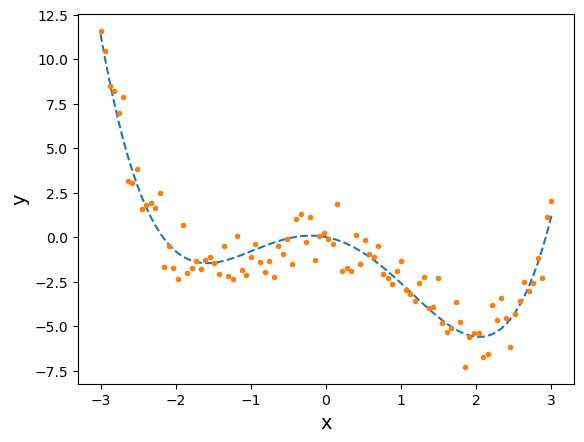

In [ ]:
np.random.seed(1358)
x = np.linspace(-3,3, 100)
y_true = 0.3 * x**4 -0.1 * x**3 - 2* x**2 - 0.8*x
y = y_true + np.random.randn(len(x))
plt.plot(x,y_true, '--')
plt.plot(x,y, '.')
plt.xlabel('x', size=14)
plt.ylabel('y', size=14)

Text(0, 0.5, 'y')

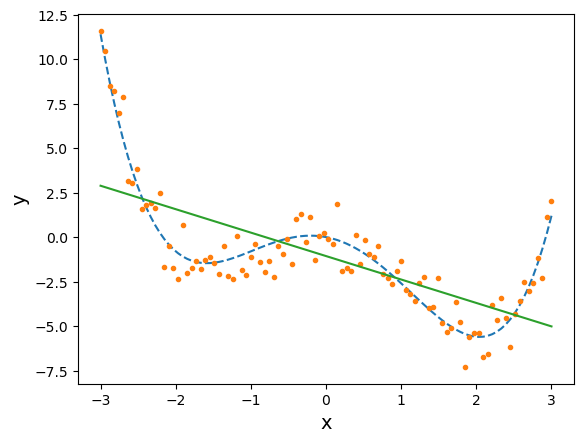

In [ ]:
data_points = zip(x,y)
data_points = list(data_points)

# Variables for the linear equation: y = a0 * x + a1
a0, a1 = sp.symbols('a0 a1')

# Sum of squared differences between observed and predicted y-values
error = sum((a1 * x + a0 - y)**2 for x, y in data_points)

# Finding partial derivatives of the error function with respect to m and c
partial_a1 = sp.diff(error, a1)
partial_a0 = sp.diff(error, a0)

# Solving the system of equations to minimise the error (least squares solution)
solution = sp.solve((partial_a1, partial_a0), (a1, a0))

best_fit_a1, best_fit_a0 = solution[a1], solution[a0]

np.random.seed(1358)
x = np.linspace(-3,3, 100)
y_true = 0.3 * x**4 -0.1 * x**3 - 2* x**2 - 0.8*x
y = y_true + np.random.randn(len(x))
plt.plot(x,y_true, '--')
plt.plot(x,y, '.')
plt.plot(x, best_fit_a1 * x + best_fit_a0, '-')
plt.xlabel('x', size=14)
plt.ylabel('y', size=14)

Text(0, 0.5, 'y')

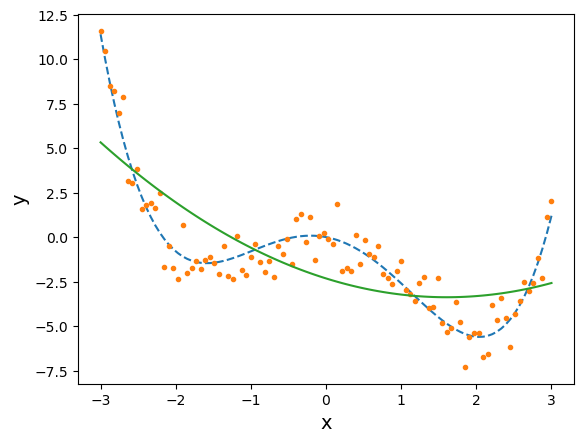

In [ ]:
# Variables for the linear equation: y = a2 * x**2 + a1 * x + a0
a0, a1, a2 = sp.symbols('a0 a1 a2')

# Sum of squared differences between observed and predicted y-values
error = sum((a2 * x**2 + a1 * x + a0 - y)**2 for x, y in data_points)

# Finding partial derivatives of the error function with respect to m and c
partial_a2 = sp.diff(error, a2)
partial_a1 = sp.diff(error, a1)
partial_a0 = sp.diff(error, a0)


# Solving the system of equations to minimise the error (least squares solution)
solution = sp.solve((partial_a2, partial_a1, partial_a0), (a2, a1, a0))

best_fit_a2, best_fit_a1, best_fit_a0 = solution[a2], solution[a1], solution[a0]

np.random.seed(1358)
x = np.linspace(-3,3, 100)
y_true = 0.3 * x**4 -0.1 * x**3 - 2* x**2 - 0.8*x
y = y_true + np.random.randn(len(x))
plt.plot(x,y_true, '--')
plt.plot(x,y, '.')
plt.plot(x,best_fit_a2 * x**2 + best_fit_a1 * x + best_fit_a0, '-')
plt.xlabel('x', size=14)
plt.ylabel('y', size=14)

Text(0, 0.5, 'y')

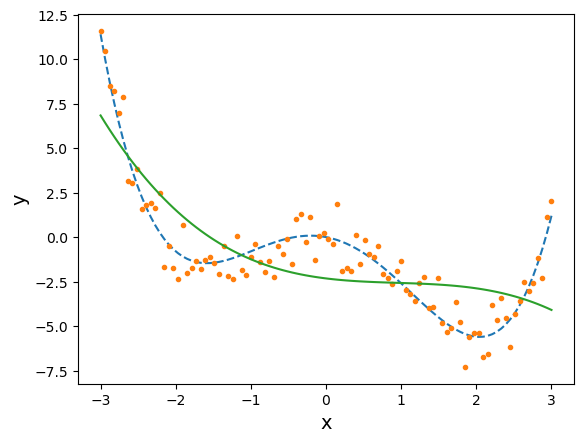

In [ ]:
# Variables for the linear equation: y = a3 * x**3 + a2 * x**2 + a1 * x + a0
a0, a1, a2, a3 = sp.symbols('a0 a1 a2 a3')

# Sum of squared differences between observed and predicted y-values
error = sum((a3 * x**3 + a2 * x**2 + a1 * x + a0 - y)**2 for x, y in data_points)

# Finding partial derivatives of the error function with respect to m and c
partial_a3 = sp.diff(error, a3)
partial_a2 = sp.diff(error, a2)
partial_a1 = sp.diff(error, a1)
partial_a0 = sp.diff(error, a0)


# Solving the system of equations to minimise the error (least squares solution)
solution = sp.solve((partial_a3, partial_a2, partial_a1, partial_a0), (a3, a2, a1, a0))

best_fit_a3, best_fit_a2, best_fit_a1, best_fit_a0 = solution[a3], solution[a2], solution[a1], solution[a0]

np.random.seed(1358)
x = np.linspace(-3,3, 100)
y_true = 0.3 * x**4 -0.1 * x**3 - 2* x**2 - 0.8*x
y = y_true + np.random.randn(len(x))
plt.plot(x,y_true, '--')
plt.plot(x,y, '.')
plt.plot(x, best_fit_a3*x**3 + best_fit_a2 * x**2 + best_fit_a1 * x + best_fit_a0, '-')
plt.xlabel('x', size=14)
plt.ylabel('y', size=14)

Text(0, 0.5, 'y')

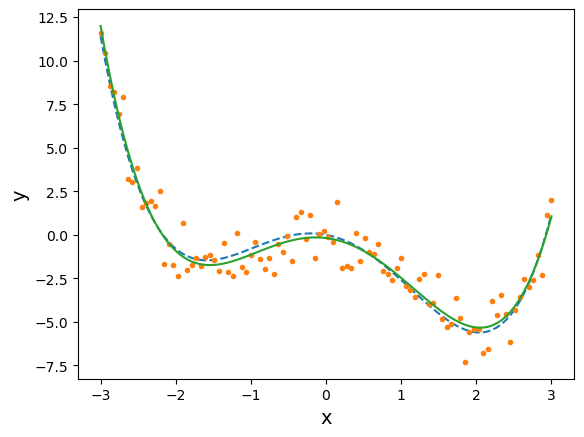

In [ ]:
# Variables for the linear equation: y = a4 * x**4 + a3 * x**3 + a2 * x**2 + a1 * x + a0
a0, a1, a2, a3, a4 = sp.symbols('a0 a1 a2 a3 a4')

# Sum of squared differences between observed and predicted y-values
error = sum((a4 * x**4 + a3 * x**3 + a2 * x**2 + a1 * x + a0 - y)**2 for x, y in data_points)

# Finding partial derivatives of the error function with respect to m and c
partial_a4 = sp.diff(error, a4)
partial_a3 = sp.diff(error, a3)
partial_a2 = sp.diff(error, a2)
partial_a1 = sp.diff(error, a1)
partial_a0 = sp.diff(error, a0)


# Solving the system of equations to minimise the error (least squares solution)
solution = sp.solve((partial_a4, partial_a3, partial_a2, partial_a1, partial_a0), (a4, a3, a2, a1, a0))

best_fit_a4, best_fit_a3, best_fit_a2, best_fit_a1, best_fit_a0 = solution[a4], solution[a3], solution[a2], solution[a1], solution[a0]

np.random.seed(1358)
x = np.linspace(-3,3, 100)
y_true = 0.3 * x**4 -0.1 * x**3 - 2* x**2 - 0.8*x
y = y_true + np.random.randn(len(x))
plt.plot(x,y_true, '--')
plt.plot(x,y, '.')
plt.plot(x, best_fit_a4*x**4 + best_fit_a3*x**3 + best_fit_a2 * x**2 + best_fit_a1 * x + best_fit_a0, '-')
plt.xlabel('x', size=14)
plt.ylabel('y', size=14)

Text(0, 0.5, 'y')

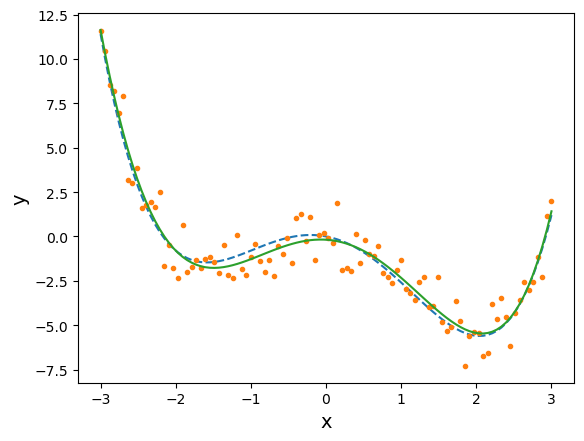

In [ ]:
# Variables for the linear equation: y = a5 * x**5 + a4 * x**4 + a3 * x**3 + a2 * x**2 + a1 * x + a0
a0, a1, a2, a3, a4, a5 = sp.symbols('a0 a1 a2 a3 a4 a5')

# Sum of squared differences between observed and predicted y-values
error = sum((a5 * x**5 + a4 * x**4 + a3 * x**3 + a2 * x**2 + a1 * x + a0 - y)**2 for x, y in data_points)

# Finding partial derivatives of the error function with respect to m and c
partial_a5 = sp.diff(error, a5)
partial_a4 = sp.diff(error, a4)
partial_a3 = sp.diff(error, a3)
partial_a2 = sp.diff(error, a2)
partial_a1 = sp.diff(error, a1)
partial_a0 = sp.diff(error, a0)


# Solving the system of equations to minimise the error (least squares solution)
solution = sp.solve((partial_a5, partial_a4, partial_a3, partial_a2, partial_a1, partial_a0), (a5, a4, a3, a2, a1, a0))

best_fit_a4, best_fit_a3, best_fit_a2, best_fit_a1, best_fit_a0 = solution[a4], solution[a3], solution[a2], solution[a1], solution[a0]
best_fit_a5 = solution[a5]

np.random.seed(1358)
x = np.linspace(-3,3, 100)
y_true = 0.3 * x**4 -0.1 * x**3 - 2* x**2 - 0.8*x
y = y_true + np.random.randn(len(x))
plt.plot(x,y_true, '--')
plt.plot(x,y, '.')
plt.plot(x, best_fit_a5*x**5 + best_fit_a4*x**4 + best_fit_a3*x**3 + best_fit_a2 * x**2 + best_fit_a1 * x + best_fit_a0, '-')
plt.xlabel('x', size=14)
plt.ylabel('y', size=14)

Which model fits best with data set x, y?

Model 4 fits best with the data.

How do you compare the models?

I compare the fucntion that I created with the dashed line.

    Task 3

In [ ]:
#Derivatite of y = x^2 + 2x + 1
x, y = symbols('x y')
y = x**2 + 2*x + 1

der_y = diff(y, x)
der_y

2*x + 2

In [ ]:
#Derivatite of y = (3x - 5)^2
x, y = symbols('x y')
y = (3*x - 5)**2

der_y = diff(y, x)
der_y

18*x - 30

In [ ]:
#Derivatite of y = (x^(1/2) - 1)^2 - (x^2 + 1)^4
x, y = symbols('x y')
y = (x**(1/2) - 1)**2 - (x**2 + 1)**4

der_y = diff(y, x)
der_y

1.0*(x**0.5 - 1)/x**0.5 - 8*x*(x**2 + 1)**3

In [ ]:
#Derivatite of y = 7cot(x) - 8(cos(x))^(-1)
x, y = symbols('x y')
y = 7*sp.cot(x) - 8*(sp.cos(x))**(-1)

der_y = diff(y, x)
der_y

-8*sin(x)/cos(x)**2 - 7*cot(x)**2 - 7

In [ ]:
#Derivatite of y = x - ln(x) + 7
x, y = symbols('x y')
y = x - sp.ln(x) + 7

der_y = diff(y, x)
der_y

1 - 1/x

In [ ]:
#Derivatite of y = -10e^x +5^x - 5x +x/5
x, y = symbols('x y')
y = -10*sp.exp(x) + 5**x - 5*x + x/5

der_y = diff(y, x)
der_y

5**x*log(5) - 10*exp(x) - 24/5

In [ ]:
#Derivatite of y = (2sin(x)) / sin(x) - cos(x)
x, y = symbols('x y')
y = (2*sp.sin(x)) / sp.sin(x) - sp.cos(x)

der_y = diff(y, x)
der_y

sin(x)

In [ ]:
#Derivatite of y = (x^2*ln(x)) / 1 - tan(x)^(-1)
x, y = symbols('x y')
y = (x**2*sp.ln(x)) / 1 - sp.tan(x)**(-1)

der_y = diff(y, x)
der_y

2*x*log(x) + x - (-tan(x)**2 - 1)/tan(x)**2

### Assignment for "Multivariable Calculus"

This task is associated with the "Insufficient" criterion in ILO 7.0. You need to complete the assignments 1-4 at the end of [this page](https://adsai.buas.nl/Study%20Content/Advanced%20Python/27.MultivariableCalculus.html)

Provide a link to a PDF file, for assignments 1-3 in the following cell. 

In [ ]:
# A link to a PDF file for assignments 1-3
https://github.com/BredaUniversityADSAI/2023-24b-fai1-adsai-TudorPitulice234803/blob/main/Deliverables/ILO7/MulCalAss_StudentID.pdf

Put your code  for assignment 4 in the following cell.

In [ ]:
# Put your code for assignment 4 here.

### Assignments for "Optimization Algorithms"

This task is associated with the "Sufficient" criterion in ILO 7.0. 

Complete the assignments at the end of [this page](https://adsai.buas.nl/Study%20Content/Advanced%20Python/29.OptimizationAlgorithms.html). Then put your code in the following cell.

In [ ]:
# Put your code here

### Assignments for "DataLab: Linear Regression with Gradient Descent"

This task is associated with the "Good" and "Excellent" criteria in ILO 7.0. 

Complete the assignment at the end of [this page](https://adsai.buas.nl/Study%20Content/Advanced%20Python/30.LinearRegressionGradientDescentDataLab.html). Then put your code in the following cell.

In [ ]:
# Put your code here